<a href="https://colab.research.google.com/github/jdumez10/Petrophysical__Rock_Properties_Prediction_ML/blob/main/Juan_Diego_Dumez_Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Uso de Machine Learning para la obtención de facies mecánicas y predicción de propiedades mecánicas***

El siguiente proyecto ha sido elaborado por Juan Diego Dumez García y tiene como objetivo utilizar técnicas de aprendizaje supervisado y no supervisado para la predicción de facies mecánicas y la estimación de las propiedades mecánicas. El dataset a utilizar será de uno de los pozos del campo Volve de la empresa Noruega Equinor. Este dataset es de libre acceso y puede encontrarse en la siguiente página https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html

# ***1. Entendimiento de la situación***

Esta sección está dividida en dos partes, la primera es un Contexto para entender conceptos fundamentales técnicos acerca de la indrustria de Oil & Gas, la segunda brinda el planteamiento del problema y la manera en que se plantea solucionar con este proyecto.

##***1.1. Contexto***

En la industria de Oil & Gas se lleva a cabo la perforación de pozos exploratorios y de desarrollo para hacer posible el descubrimiento y la extracción de hidrocarburos. Las operaciones de perforación y completamiento de dichos pozos son bastante costosas y asociado a estas se deben hacer tomas de datos para hacer un correcto amarre entre los pozos y el yacimiento a extraer los recursos.

Un yacimiento es simplemente una roca que alberga hidrocarburos cuyas propiedades petrofísicas y geomecánicas permiten que los hidrocarburos puedan ser extraidos de una manera económicamente rentable. 

La imagen de abajo muestra 5 pozos donde los tres de la mitad encontraron hidrocarburos líquidos en las formaciones Namut Sst y Hutton Sst. Los dos pozos de las esquinas encontraron gas condensado en la Formación Toolache. Esta imagen ha sido sacada de Kramer, L. et al (2004). En este caso, las 3 Formaciones mencionadas anteriormente se consideran como rocas yacimiento ya que albergan hidrocarburos y permiten que estos se puedan extraer de una manera económicamente rentable.

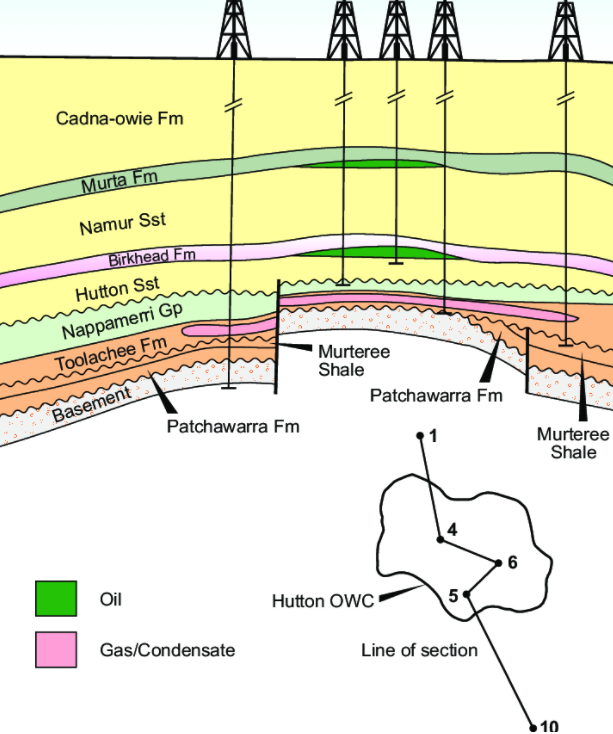

Algo fundamental a entender es que un pozo tiene un radio de solamente 8 pulgadas y puede alcanzar profundidades de hasta más de 3 kilómetros. La imagen de arriba permite hacerse la idea que un pozo no atraviesa una única roca, o Formación geológica sino que en realidad atraviesa distintos tipos de Formaciones. Así mismo, el petróleo no sube a la superficie cuando se está haciendo la perforación de un pozo dado, sino que en realidad, debe hacerse una evaluación previa para determinar dónde hay hidrocarburos y saber si puede ser rentable o no su extracción. Luego de hacerse esta evaluación, se mandan pequeñas cargas explosivas a las profundidades donde se encontró el petróleo para conectar la roca con el pozo y con ello permitir el flujo de fluidos hacia la superficie, muchas veces esto se hace acompañado de una bomba que facilita la subida del petróleo o el gas hacia superficie.

Se debe agregar que una Formación puede tener espesores de más de 120 metros (400 pies) y en este caso abarcará un conjunto de capas geológicas que compartirán entre todas un conjunto de propiedades litológicas que las diferenciará de las capas que están en las Formaciones adyacentes. Las capas geológicas son rocas y cada una de ellas tendrán propiedades diferentes. La imagen de abajo muestra a una mujer al lado de un Formación Geológica y las subdivisiones que se ven son las capas que se están mencionando (es decir distintos tipos de rocas). Esta imagen ha sido tomada de Samuele Papeschi (Dic, 2019).

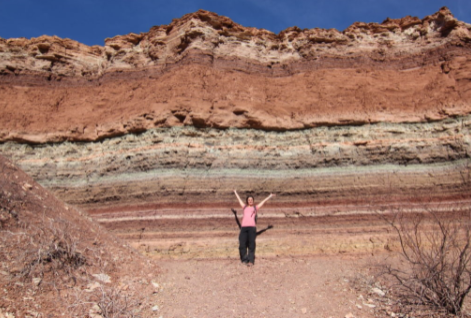

Ahora bien, debido a que un pozo atraviesa formaciones geológicas y cada formación puede tener capas cuyos espesores pueden variar entre 50 cm hasta 5 metros, se deben tomar datos de todas estas rocas y la forma de hacerlo es a partir de registros eléctricos. El objetivo no es abondar más en esto, pero si es pertinente decir que un registro eléctrico hace mediciones físicas de las rocas y a partir de estas mediciones, los petrofísicos e ingenieros de yacimientos calculan las propiedades petrofísicas y geomecánicas que permiten saber si una formación o un conjunto de capas de una formación se pueden considerar como rocas yacimiento. 

Los registros eléctricos pueden medir propiedades físicas de una roca como lo son su resistividad, la radiación natural que esta emite (radiación gamma), la densidad electrónica, el índice de hidrógeno, el tiempo de tránsito que toman en ir y volver ondas acústicas que son enviadas desde el pozo hacia las rocas, etc. Por último se debe mencionar que las mediciones de estas propiedades se hace por profundidad pie a pie, es decir, cada 30 centímetros, con lo que se tiene un buen detalle de las propiedades físicas que tiene una capa dada. La imagen de abajo muestra un ejemplo de cómo se ve un registro eléctrico. Esta imagen fue tomada de Deng et al (2018) y muestra algunos registros básicos por profundidad (en pies). Estos son registros de Gamma Ray (GR), Potencial espontáneo (SP), Resistividad somera y profunda (LLS, LLD), densidad electrónica (RHOB), índice de hidrógeno (NPHI) y el tiempo de tránsito de la onda p (DT).

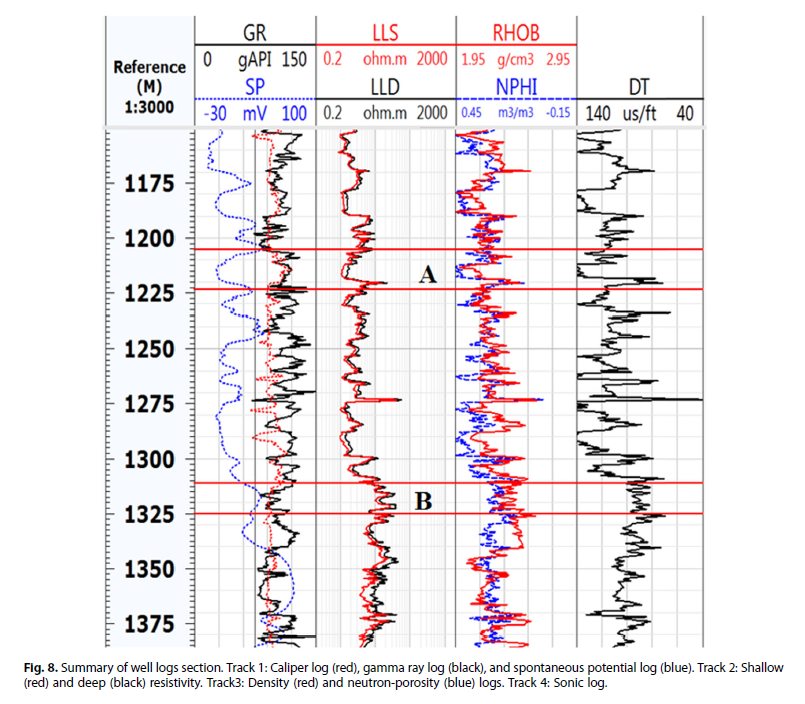

##***1.2. Plantemiento del problema e hipótesis***

La toma de registros eléctricos para un pozo dado es extremadamente costosa y no siempre se puede tomar el mismo set de registros para cada uno de los pozos. Debido a que algunos pozos pueden quedar sin algún tipo de registro, entonces no todas las propiedades petrofísicas y geomecánicas se pueden calcular para las capas que atraviesa un pozo dado. Por esta razón, se tiene como objetivo llevar a cabo la predicción, a partir de aprendizaje supervisado, de tres propiedades geomecánicas que son fundamentales de entender (Módulo de Young, Razón de Poisson y UCS) a partir de un set de registros que tienen todos los pozos y que son los registros de GR y Resistividad . Así mismo se hará esta predicción usando las curvas de GR, Resistividad, Densidad, Factor fotoeléctrico y Neutrón.

Por otro lado, debido al alto número de capas que una formación puede contener, estas mismas pueden agruparse en facies mecánicas que simplemente representan al grupo que cumple con un set de propiedades mecánicas definidas. El objetivo en este caso será llevar a cabo el uso de aprendizaje no supervisado para hacer un agrupamiento y obtener estas facies.

Con el ánimo de llevar a cabo este proyecto, se procederá en primer lugar a hacer el correspondiente import de las librerías de Python que nos servirán para ejecutar este proyecto.

In [ ]:
# Actualizamos scikit-learn a la última versión
!pip install -U scikit-learn 

# Importamos scikit-learn 
import sklearn

In [ ]:
# Librerías básicas NumPy, Pandas, Matplotlib y Seaborn.
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [ ]:
# Configuraciones para las librerías y módulos usados.

# Ignoramos las advertencias o warnings.
import warnings
warnings.simplefilter(action='ignore')

# Configuramos el formato por defecto de la 
# librería de visualización Matplotlib.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)
sns.set_theme()

In [ ]:
# Versiones de las librerías usadas.

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Plotly', plotly.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.12
NumPy 1.19.5
Pandas 1.1.5
Matplotlib 3.2.2
Seaborn 0.11.2
Plotly 4.4.1
Scikit-learn 1.0.1


Este proyecto se realizó con las siguientes versiones:

*   Python: 3.7.12
*   NumPy: 1.19.5
*   Pandas: 1.1.5
*   Matplotlib: 3.2.2
*   Seasborn: 0.11.1
*   Plotly: 4.4.1
*   Scikit-learn: 0.24.1








# ***2. Entendimiento de los datos***

Esta sección se divide en tres partes, la primera es la presentación de la base de datos, la segunda las modificaciones necesarias a la base de datos (estas modificaciones solo abarcan pasos necesarios para limpiar la base de datos) y finalmente la última parte de gráficos que presenta de manuera visual esta base de datos. ***Nota: En este caso, la segunda parte solo se encarga de hacer una limpieza que es necesaria para poder representar gráficamente a esta base de datos, el preprocesamiento de los datos se hará en la siguiente sección***

## ***2.1 Presentación de la base de datos***

Lo primero a llevar a cabo en esta etapa es obtener la base de datos que contendrá los registros y propiedades mencionadas en la sección anterior. En este caso estos datos pertencen al Pozo A y abarcan la Formación K. A continuación, se procederá a exportar la base de datos y adicional a esto se dará una descripción de la misma.

In [ ]:
## Obtenemos la base de datos a partir del archivo CSV que está cargado 
df = pd.read_csv('DataFrame.csv')

Ahora se procede hacer una exploración de las variables con el método .info()

In [ ]:
## Con esto vemos de manera general cómo está estructurada la base de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35358 entries, 0 to 35357
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth [ft]             35358 non-null  float64
 1   GR [API]               35358 non-null  float64
 2   NPHI [v/v]             35358 non-null  float64
 3   PEF [b/elec]           35358 non-null  float64
 4   PHIF [V/V]             35358 non-null  float64
 5   Poisson Ratio          35358 non-null  float64
 6   RHOB [g/cm3]           35358 non-null  float64
 7   RT [ohm.m]             35358 non-null  float64
 8   UCS [psi]              35358 non-null  float64
 9   Young Modulus [MMpsi]  35358 non-null  float64
dtypes: float64(10)
memory usage: 2.7 MB


De esta información se puede afirmar que esta base de datos se encuentra construida de la siguiente manera:


*   **Propiedades Mecánicas :** Esto abarca el módulo de Young,UCS y Razón de Poisson (adimensional)
*   **Propiedades Petrofísicas :** Acá se ha incluido la porosidad (PHIF)
*   **Registros básicos de pozo :** Esto abarca el registro Gamma y la Resistividad.
*   **Resto de registros:** Neutrón (NPHI), Densidad (RHOB) y Factor fotoeléctrico (PEF)

Se debe señalar que todos estos datos corresponden a una profundidad específica. En este caso los datos están espaciados cada 0.32 pies (ft). Se debe señalar que la industria de Oil & Gas en gran parte del mundo maneja el Sistema Inglés como sistema de referenci con lo que no habrá añgún tipo de conversión a otro sistema de unidades de medida como el Sistema Internacional. Así mismo se debe señalar que algunos de estos puntos pueden corresponder a una única capa mientras que otros representan una capa bastante delgada. Esto hace que la Formación a analizar sea altamente heterogénea. La ventaja de hacer una clasificación de facies mecánicas es entonces el hecho de simplificar un número significativo de capas en macro capas con propiedades mecánicas similares.





Note que en un inicio el parámetro info() ha mostrado como si no tuviésemos ningún dato nulo en esta base de datos, sin embargo, esto no es correcto. Con el ánimo de tener una exploración inicial de los datos, usamos los métodos head y sample para ver cómo está diligenciada esta base de datos

In [ ]:
df.head(10)

Depth [ft]  GR [API]  ...   UCS [psi]  Young Modulus [MMpsi]
0    478.6745    -999.0  ... -247073.031                 -999.0
1    479.0026    -999.0  ... -247073.031                 -999.0
2    479.3307    -999.0  ... -247073.031                 -999.0
3    479.6588    -999.0  ... -247073.031                 -999.0
4    479.9869    -999.0  ... -247073.031                 -999.0
5    480.3150    -999.0  ... -247073.031                 -999.0
6    480.6430    -999.0  ... -247073.031                 -999.0
7    480.9711    -999.0  ... -247073.031                 -999.0
8    481.2992    -999.0  ... -247073.031                 -999.0
9    481.6273    -999.0  ... -247073.031                 -999.0

[10 rows x 10 columns]

In [ ]:
df.tail(10)

Depth [ft]  GR [API]  ...   UCS [psi]  Young Modulus [MMpsi]
35348  12076.7720    -999.0  ... -247073.031                 -999.0
35349  12077.1001    -999.0  ... -247073.031                 -999.0
35350  12077.4282    -999.0  ... -247073.031                 -999.0
35351  12077.7563    -999.0  ... -247073.031                 -999.0
35352  12078.0844    -999.0  ... -247073.031                 -999.0
35353  12078.4124    -999.0  ... -247073.031                 -999.0
35354  12078.7405    -999.0  ... -247073.031                 -999.0
35355  12079.0686    -999.0  ... -247073.031                 -999.0
35356  12079.3967    -999.0  ... -247073.031                 -999.0
35357  12079.7248    -999.0  ... -247073.031                 -999.0

[10 rows x 10 columns]

De estos dos métodos se puede observar que en realidad si hay datos nulos en la base de datos pero no están como datos vación sino que se representan por el valor -999.00. Tomando esto en cuenta, esta base de datos se modificará en la sección de preparación de datos. Otro punto a señalar es que todas las variables que se están trabajando son numéricas.


## ***2.2 Modificaciones a la base de datos***

En este caso, crearemos un nuevo data frame basándose en el dataframe anterior que permitirá a partir de las modificaciones realizar los análisis de datos y visualizaciones de este proyecto. Lo primero a realizar es crear el nuevo data frame ds que será para llevar a cabo las modificaciones necesaria para nuestro análisis de datos.

In [ ]:
ds = df

Ahora procederemos a usar el método replace para remplazar los valores de -999.00 por valores nulos como se muestra abajo:

In [ ]:
ds = ds.replace(-999, np.nan)

Ahora si miremos cuáles filas tienen datos nulos y cuáles no. Así mismo se pude hacer un conteo de esos datos

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35358 entries, 0 to 35357
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth [ft]             35358 non-null  float64
 1   GR [API]               34668 non-null  float64
 2   NPHI [v/v]             10521 non-null  float64
 3   PEF [b/elec]           10548 non-null  float64
 4   PHIF [V/V]             2278 non-null   float64
 5   Poisson Ratio          10199 non-null  float64
 6   RHOB [g/cm3]           10548 non-null  float64
 7   RT [ohm.m]             34208 non-null  float64
 8   UCS [psi]              35358 non-null  float64
 9   Young Modulus [MMpsi]  10221 non-null  float64
dtypes: float64(10)
memory usage: 2.7 MB


Cómo se puede observar, en realidad se tienen más de 20,000 datos nulos para algunos registros. Esto se debe a que el pozo tiene una profundidad bastante alta y solo se adquieren registros más detallados (neutrón, densidad, etc) para las zonas de interés. Esto se puede ver de nuevo con el método sample.

In [ ]:
ds.sample(10)

Depth [ft]  GR [API]  ...    UCS [psi]  Young Modulus [MMpsi]
7142    2821.8505   51.8260  ... -247073.0310                    NaN
3269    1551.1811   68.2269  ... -247073.0310                    NaN
1168     861.8767   28.0595  ... -247073.0310                    NaN
23024   8032.4806   45.4998  ... -247073.0310                    NaN
23764   8275.2627  107.1457  ... -247073.0310                    NaN
15823   5669.9477   86.9664  ... -247073.0310                    NaN
15368   5520.6695   87.4775  ... -247073.0310                    NaN
16724   5965.5514  106.0571  ... -247073.0310                    NaN
10774   4013.4516   27.6183  ... -247073.0310                    NaN
30884  10611.2208   53.7832  ...    8226.6816                 5.0068

[10 rows x 10 columns]

Es obligatorio siempre tomar registros GR y Resistivo en todo un pozo. Note que los datos nulos básicamente aplican para una misma profundidad, esto debido a las razones expuestas con anterioridad. Así mismo en estas filas nulas no se tienen registros sónicos para obtener las ondas p y s con las cuales se calcula el módulo de Young y la razón de Poisson. El UCS se deriva del módulo de Young y debid a que tiene una constante negativa en su fómula, para las profundidades donde no se tienen registros sónicos el UCS es negativo. 

Como vimos en la parte del comando ds.info(), solo hay 2281 datos que tienen cálculos asociados a porosidad. Estos 2281 datos abarcan una única Formación con lo cual se procederá a eliminar todas las filas nulas que no cuenten con valores de porosidad. El cálculo de porosidad en este caso se ha hecho para la Formación de interés, con lo cual se están descartando el resto de Formaciones (este pozo atraviesa aproximandamente 12).

In [ ]:
ds.dropna(subset=["PHIF [V/V]"], inplace=True) #Podemos elegir cualquier columna de datos XRF por lo explicado anteriormente

Como se puede ver abajo, ya con esto se ha hecho una importante limpieza de datos. No obsante aún se tienen datos nulos asociados al módulo de Young y la razón de Poisson. Esto se puede deber a algunos errores operativos que hacen que las herramientas no tomen datos correctos de las propiedades físicas que están midiendo. En este caso se eliminarán los datos nulos del módulo de Young.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 32835 to 35112
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth [ft]             2278 non-null   float64
 1   GR [API]               2278 non-null   float64
 2   NPHI [v/v]             2277 non-null   float64
 3   PEF [b/elec]           2278 non-null   float64
 4   PHIF [V/V]             2278 non-null   float64
 5   Poisson Ratio          2125 non-null   float64
 6   RHOB [g/cm3]           2278 non-null   float64
 7   RT [ohm.m]             2278 non-null   float64
 8   UCS [psi]              2278 non-null   float64
 9   Young Modulus [MMpsi]  2125 non-null   float64
dtypes: float64(10)
memory usage: 195.8 KB


In [ ]:
ds.dropna(subset=["Young Modulus [MMpsi]"], inplace=True) #Podemos elegir cualquier columna de datos XRF por lo explicado anteriormente

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2125 entries, 32835 to 34959
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth [ft]             2125 non-null   float64
 1   GR [API]               2125 non-null   float64
 2   NPHI [v/v]             2125 non-null   float64
 3   PEF [b/elec]           2125 non-null   float64
 4   PHIF [V/V]             2125 non-null   float64
 5   Poisson Ratio          2125 non-null   float64
 6   RHOB [g/cm3]           2125 non-null   float64
 7   RT [ohm.m]             2125 non-null   float64
 8   UCS [psi]              2125 non-null   float64
 9   Young Modulus [MMpsi]  2125 non-null   float64
dtypes: float64(10)
memory usage: 182.6 KB


Con esto ya se puede ver que se contará con 2125 datos para llevar a cabo estos análisis.

## ***2.3 Representación gráfica de la base de datos***

Ahora procedamos a hacer una gráfica de la razón de Poisson vs el módulo de Young. En este caso son estas dos variables las que permitirán definir las facies mecánicas de la Formación K. 

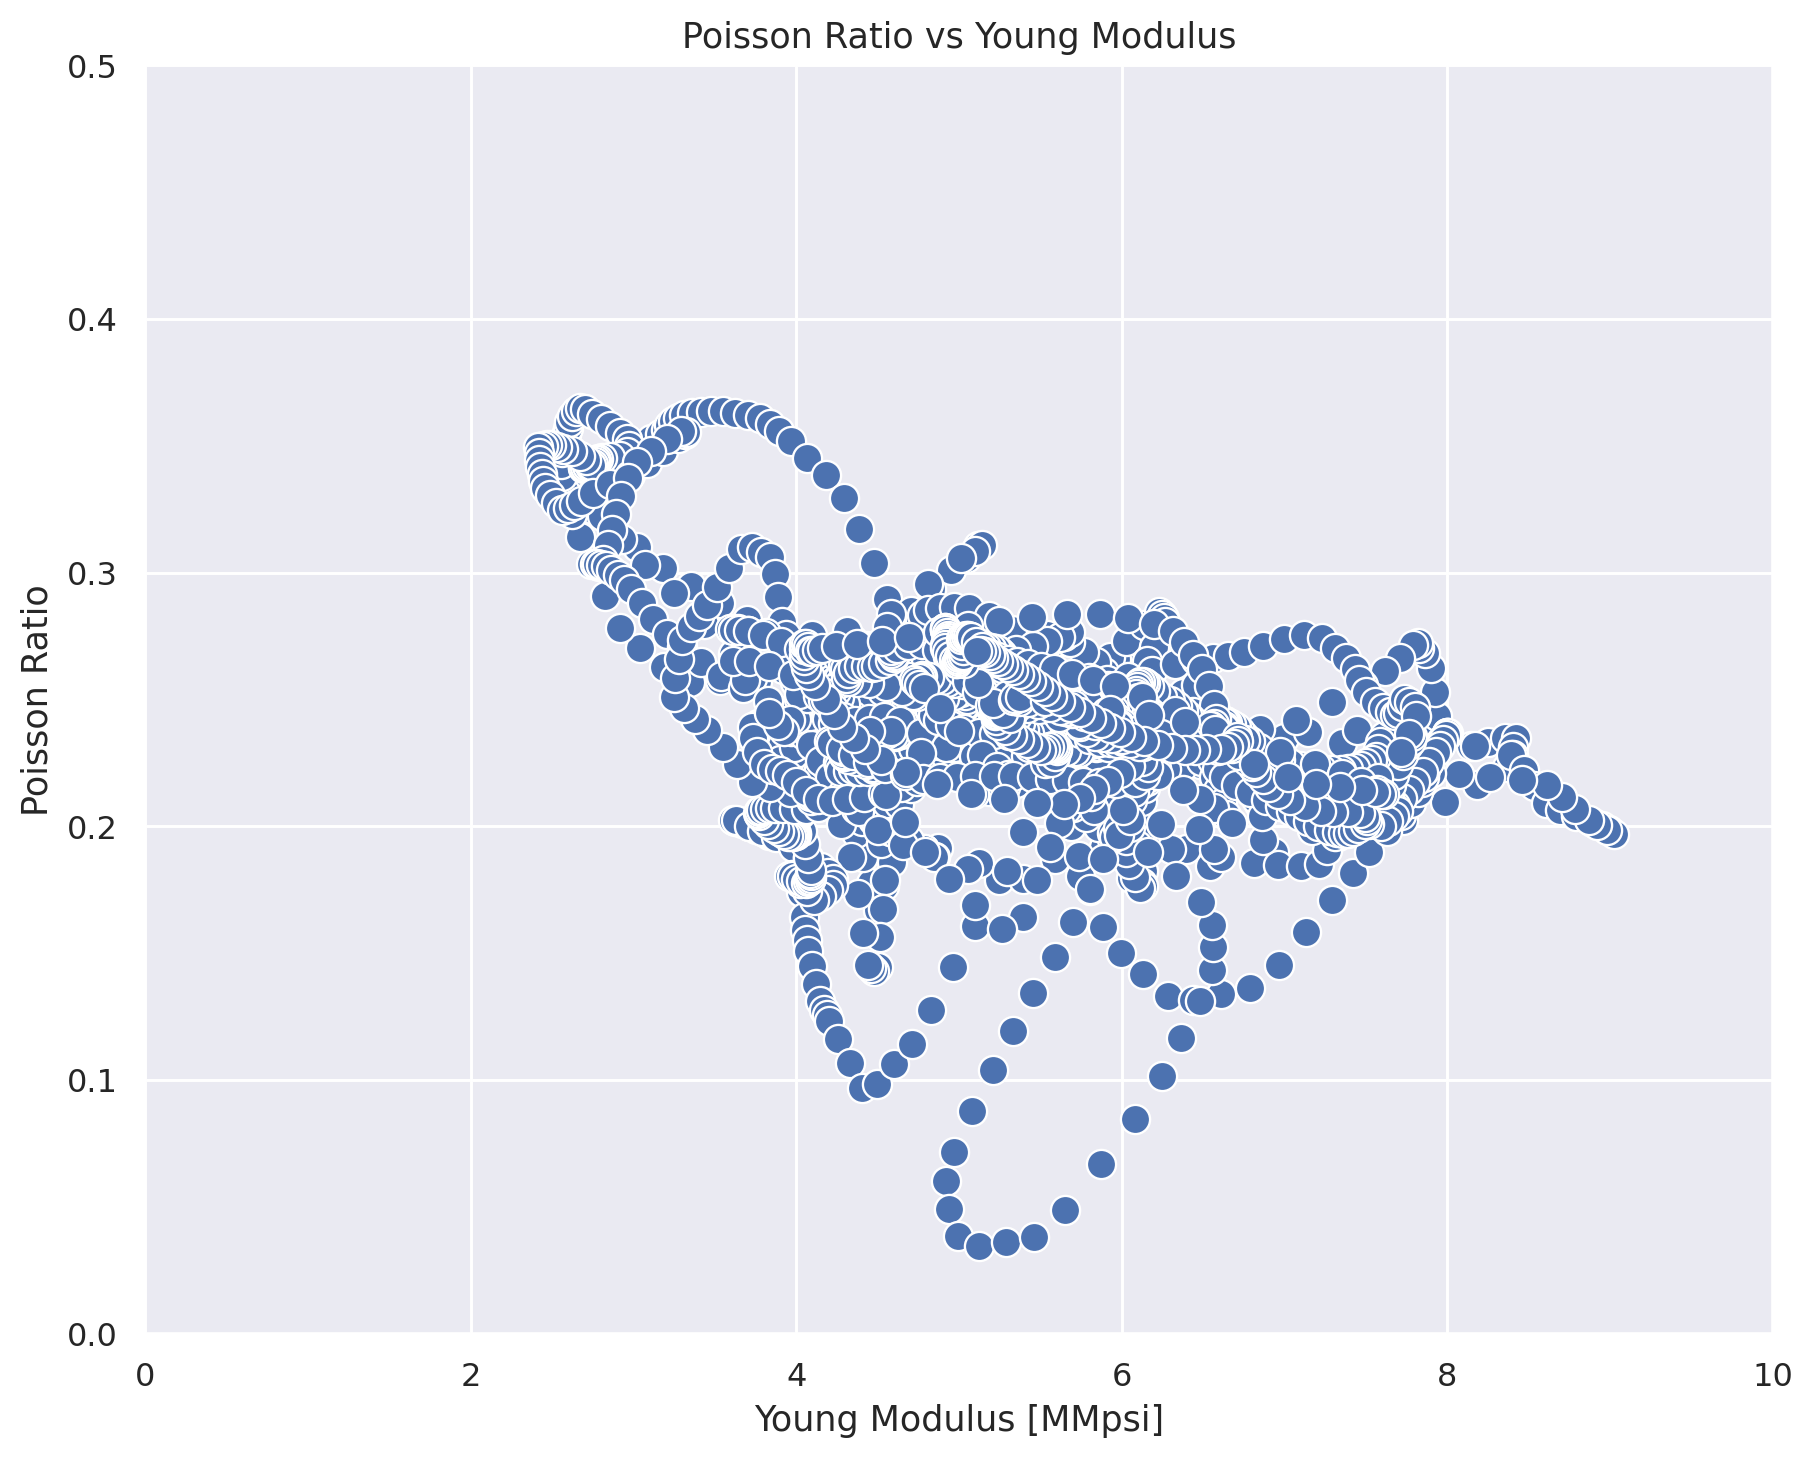

In [ ]:
# Scatter Plot Razón de Poisson vs Young Modulus
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.scatterplot(data=ds, x="Young Modulus [MMpsi]", y="Poisson Ratio",
                s=100
                )

# Ajustamos los ejes y le ponemos sus respectivos nombre
plt.xlabel("Young Modulus [MMpsi]", fontsize=12)
plt.xlim(0,10)

plt.ylabel("Poisson Ratio", fontsize=12)
plt.ylim(0.0, 0.5)

plt.title("Poisson Ratio vs Young Modulus")
plt.show()

Ahora bien, a continuación se muestra el gráfico de los registros eléctricos GR, Resistividad, Densidad y Módulo de Young para la Formación K. Debo señalar que estos plots los he construido basándome en el foro de Andy Mcdonald, un Geocientífico y Data Scientist que aplica esta rama a la industria de oil and gas. El link de Github donde se encuentra esta los notebooks de los que me he guiado: https://github.com/andymcdgeo/Andys_YouTube_Notebooks

Algo importante a saber es de dónde a dónde va la Formación K. Esto se puede hacer con los valores mínimo y máximo de las profundidades que se están analizando.

In [ ]:
min, max = ds['Depth [ft]'].min() , ds['Depth [ft]'].max() 
print(min, max)

11251.3127 11948.1631


Es decir nuestro rango va desde los 11,251 ft a los 11,948 ft. 

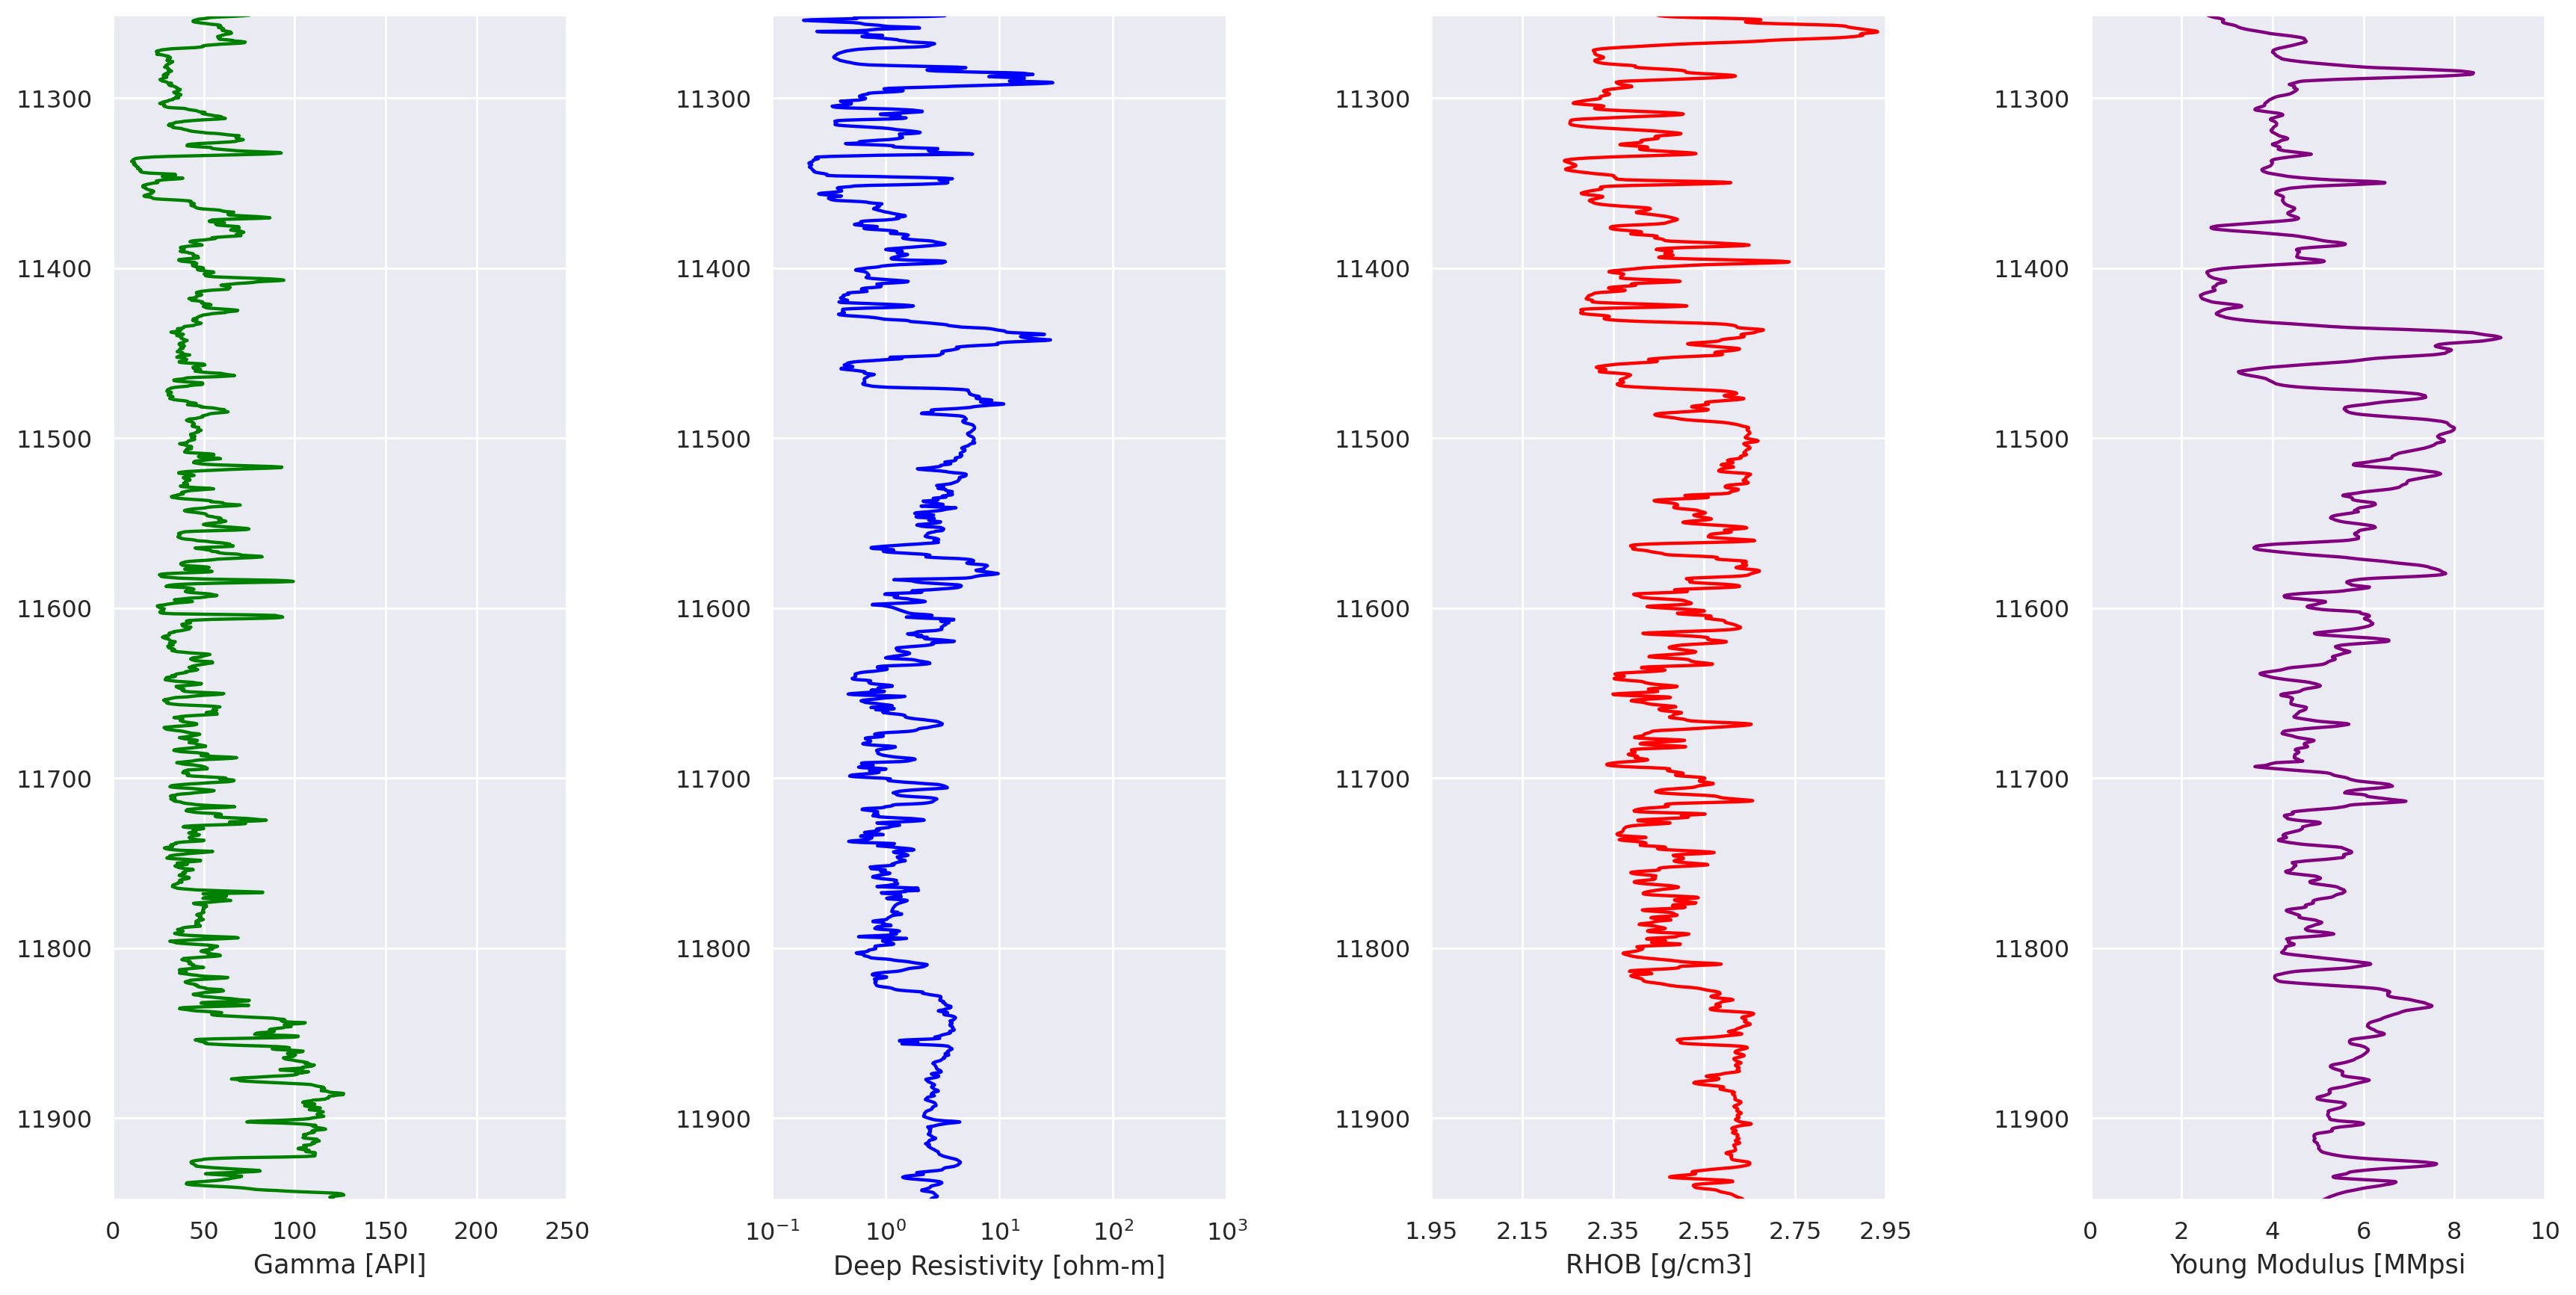

In [ ]:
fig, axes = plt.subplots(figsize=(20,10))

curve_names = ['Gamma [API]', 'Deep Resistivity [ohm-m]', 'RHOB [g/cm3]', 'Young Modulus [MMpsi']

ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1) 

# Gamma Ray Plot
ax1.plot("GR [API]", "Depth [ft]", data = ds, color = "green") 
ax1.set_xlim(0, 250) 
ax1.set_xticks([0, 50, 100, 150, 200, 250])
ax1.grid() 


# Deep Resistivity 
ax2.plot("RT [ohm.m]", "Depth [ft]", data = ds, color = "Blue")
ax2.set_xlim(0.1, 1000)
ax2.set_xticks([0.1, 10, 100, 1000])
ax2.semilogx()
ax2.grid()

# Calcium Content
ax3.plot('RHOB [g/cm3]', 'Depth [ft]', data = ds, color = "Red")
ax3.set_xlim(1.95, 2.95)
ax3.set_xticks([1.95, 2.15, 2.35, 2.55, 2.75, 2.95])
ax3.grid()

# Young Modulus
ax4.plot('Young Modulus [MMpsi]', 'Depth [ft]', data = ds, color = "Purple")
ax4.set_xlim(0, 10)
ax4.set_xticks([0, 2, 4, 6, 8, 10])
ax4.grid()

# Max, Min Depth
min, max = ds['Depth [ft]'].min() , ds['Depth [ft]'].max() 

for i, ax in enumerate(fig.axes):
    ax.set_ylim(max, min) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

fig.subplots_adjust(wspace = 0.45)

# ***3. Preprocesamiento de los datos***

En esta etapa y con el objetivo de estandarizar los datos y mantener el comportamiento que presentan se llevará a cabo la estandarización a partir de MinMaxScaler.

## ***3.1 Ejecución MinMax Scaler y creación de DataFrames a usar***

En la siguientes celda ejecutamos el comando MinMaxScaler para aplicar las transformaciones explicadas con anterioridad. Debido a que solo se cuenta con variables numéricas, entonces no es necesario llevar a cabo métodos como OneHotEnconder()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Ahora bien, como se va a llevar a cabo un análisis supervisado y no supervisado para distintos objetivos, varios dataframes se deben crear para llevar a cabo estos métodos.

### ***Preprocesamiento DataFrames Aprendizaje No Supervisado***

Para el aprendizaje no supervisado únicamente se necesitan el Módulo de Young y la Razón de Poisson con lo cual se creará y se estandarizará un dataframe con este modelo

In [ ]:
numeric = ['Young Modulus [MMpsi]', 'Poisson Ratio'] # Definimos las listas que contendrán la variable numérica

from sklearn.compose import ColumnTransformer
tf = ColumnTransformer([('scaler', MinMaxScaler(), numeric)])

X_ns = tf.fit_transform(ds)

### ***Preprocesamiento DataFrames Aprendizaje Supervisado***

En esta sección se crearán simplemente los dataframes a utilizar en el aprendizaje supervisado para la predicción de propiedades mecánicas. La partición se llevará a cabo en la siguiente sección. El primer Data Frame contendrá los datos de Gamma Ray y Resitividad que serán usados para predecir el Módulo de Young, UCS y la razón de Poisson.

In [ ]:
numericX1 = ['GR [API]','RT [ohm.m]']

tf = ColumnTransformer([('scaler', MinMaxScaler(), numericX1)])

X1_s = tf.fit_transform(ds)

El segundo Data Frame contendrá los datos de Gamma Ray, Resistividad, Densidad, Factor fotoeléctrico y Neutrón.

In [ ]:
numericX2 = ['GR [API]','RT [ohm.m]','RHOB [g/cm3]','PEF [b/elec]','NPHI [v/v]']

tf = ColumnTransformer([('scaler', MinMaxScaler(), numericX2)])

X2_s = tf.fit_transform(ds)

Los siguientes datos corresponden a las variables a predecir UCS, Módulo de Young y Razón de Poisson

In [ ]:
yf1 = ColumnTransformer([('scaler', MinMaxScaler(), ['UCS [psi]'])])
yf2 = ColumnTransformer([('scaler', MinMaxScaler(), ['Young Modulus [MMpsi]'])])
yf3 = ColumnTransformer([('scaler', MinMaxScaler(), ['Poisson Ratio'])])


UCS = yf1.fit_transform(ds)
YM = yf2.fit_transform(ds)
PR = yf3.fit_transform(ds)

# ***4. Rompimiento de los datos***

Ahora vamos a llevar a cabo la partición de los datos que se tienen en datos de entrenamiento y prueba. Esto se hará para el set de datos con los que se hará el Aprendizaje Supervisado. A continuación importamos train_test_split del submódulo sklearn.model_selection. Tomando en cuenta lo visto en clase, se hará una partición del 30% de los datos para pruebas y 70% para los datos de entrenamiento. 

In [ ]:
# Submódulo de selección de modelos y partición de datos.
from sklearn.model_selection import train_test_split

## ***Rompimiento de los datos sobre X1_s***

Esto lo usamos entonces sobre X1_s. Notemos que esto hay que hacerle para 3 variables independientes a obtenerse, UCS, Young Modulus y Razón de Poisson con una semilla aleatoria de 57.

In [ ]:
# Partición UCS
X1_s_train, X1_s_test, UCS_D1_train, UCS_D1_test = train_test_split(X1_s, 
                                                                    UCS, 
                                                                    test_size=0.3, 
                                                                    random_state=57)

# Partición Young Modulus
X1_s_train, X1_s_test, YM_D1_train, YM_D1_test = train_test_split(X1_s, 
                                                                    YM, 
                                                                    test_size=0.3, 
                                                                    random_state=57)

# Partición Poisson Ratio
X1_s_train, X1_s_test, PR_D1_train, PR_D1_test = train_test_split(X1_s, 
                                                                    PR, 
                                                                    test_size=0.3, 
                                                                    random_state=57)

## ***Rompimiento de los datos sobre X2_s***

Hacemos lo mismo visto anteriormente pero para X2_s

In [ ]:
# Partición UCS
X2_s_train, X2_s_test, UCS_D2_train, UCS_D2_test = train_test_split(X2_s, 
                                                                    UCS, 
                                                                    test_size=0.3, 
                                                                    random_state=57)

# Partición Young Modulus
X2_s_train, X2_s_test, YM_D2_train, YM_D2_test = train_test_split(X2_s, 
                                                                    YM, 
                                                                    test_size=0.3, 
                                                                    random_state=57)

# Partición Poisson Ratio
X2_s_train, X2_s_test, PR_D2_train, PR_D2_test = train_test_split(X2_s, 
                                                                    PR, 
                                                                    test_size=0.3, 
                                                                    random_state=57)

Tomando en cuenta que los ordenamientos se respetan (se ha usado la misma semilla y el mismo porcentaje en el rompimiento de los datos), para simplificar haremos lo siguiente:

In [ ]:
# UCS
UCS_train = UCS_D1_train 
UCS_test = UCS_D1_test

# YM
YM_train = YM_D1_train
YM_test = YM_D1_test

# Poisson Ratio
PR_train = PR_D1_train
PR_test = PR_D1_test

UCS_train

array([[0.30506073],
       [0.2754289 ],
       [0.62590032],
       ...,
       [0.32010322],
       [0.62635146],
       [0.43591792]])

# ***5. Aprendizaje no Supervisado para la Obtención de Facies Mecánicas***

Para el aprendizaje no supervisado en este caso se utilizará el método de K-means y así mismo se utilizarán evaluaciones de desempeño internos. En este caso no se han hecho rompimientos de los datos pues se está llevando a cabo solamente la partición de los mismos.

In [ ]:
# Usaremos la inercia y el coeficiente de silueta para evaluar nuestro modelo
inertia = [] 
silhouette = []

# Métodos de agrupamiento - Algoritmo K-means
from sklearn.cluster import KMeans

# Métricas de rendimiento
from sklearn.metrics import silhouette_score

# Usaremos un rango de Ks de 2 a 10 y por medio de los evaluadores explicados anteriormente sabremos cuál es el mejor
K = range(2,11)
for i in K:
  # Declaramos y ejecutamos el algoritmo K-means
  model = KMeans(n_clusters = i)
  model.fit(X_ns)

  # Predecimos las etiquetas de X_ns
  y = model.predict(X_ns)

  # Almacenamos la métrica de inercia y el coeficiente de silueta
  inertia.append(model.inertia_)
  silhouette.append(silhouette_score(X_ns, y))

La idea ahora es hacer una gráfica de codo y también del coeficiente de silueta. Para ello se hace uso de la definición de la función plot_metric.

In [ ]:
# Se grafica la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

Con la función definida se hacen las dos gráficas mencionadas anteriormente

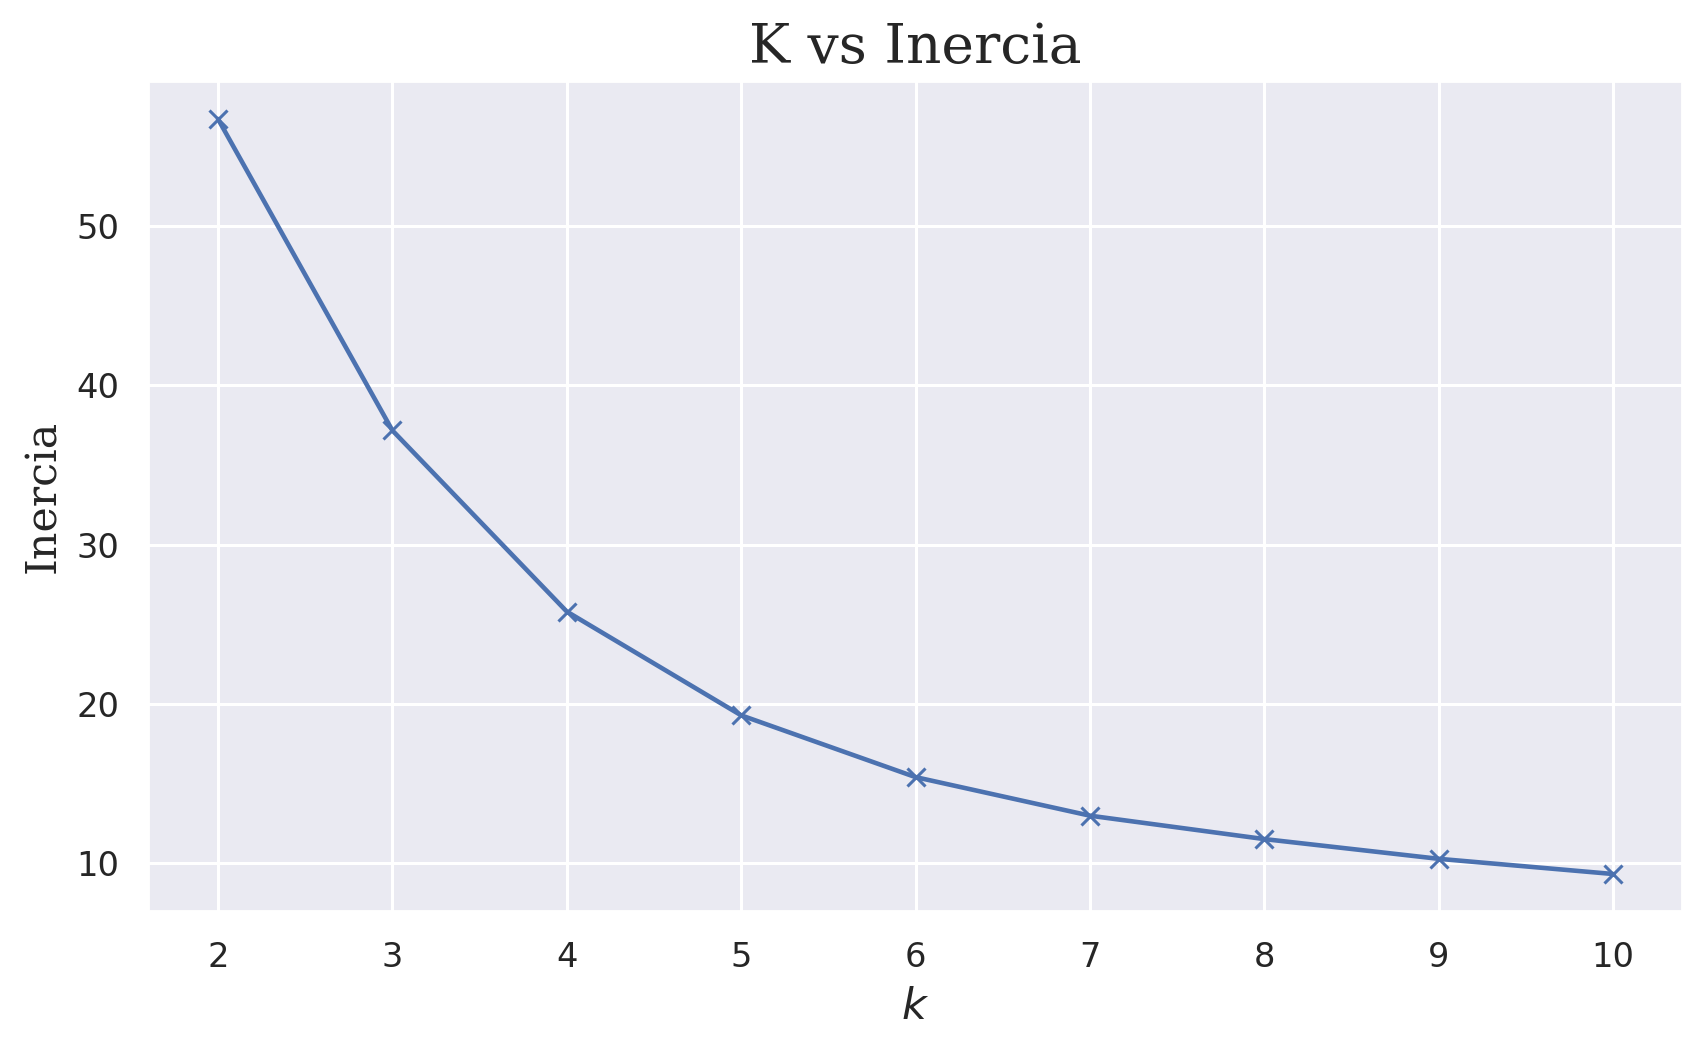

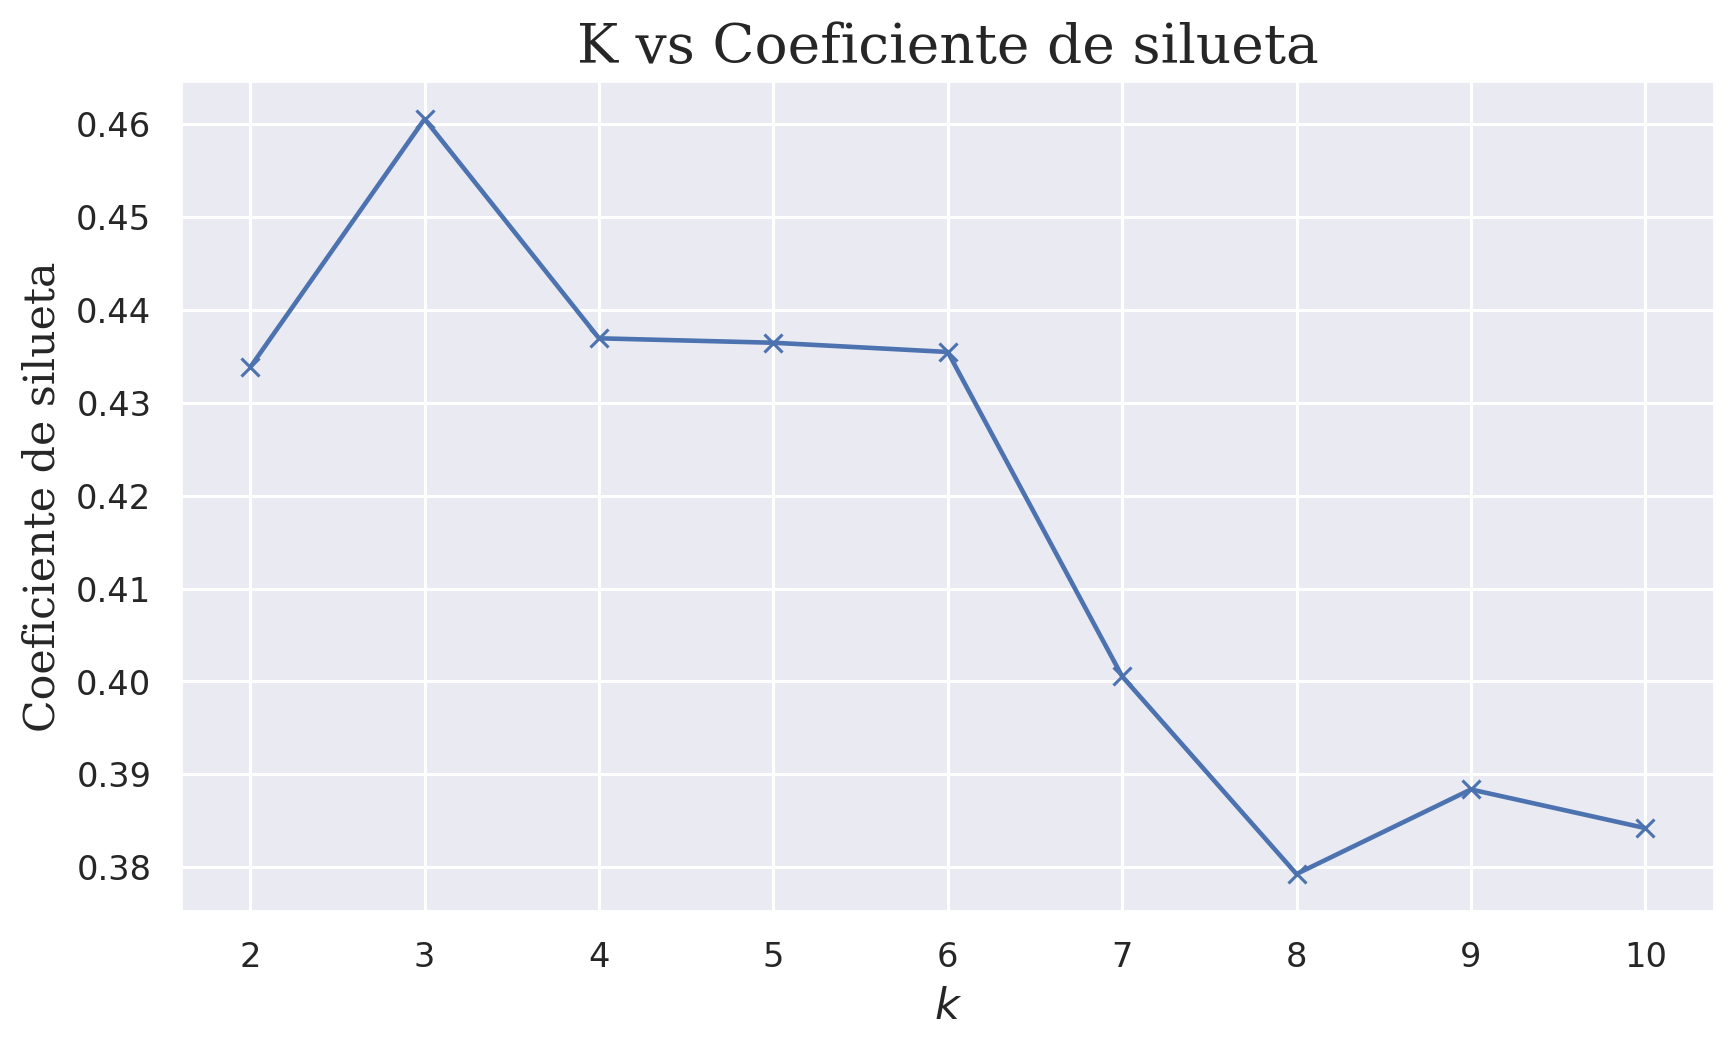

In [ ]:
plot_metric(K, inertia, 'Inercia')
plot_metric(K, silhouette, 'Coeficiente de silueta')

A partir de la evaluación de desempeño interno se puede concluir que un buen número para k en este caso es 3. Veamos esto gráficamente con el set de conjunto de datos definidos con anterioridad. Para ello se define la función experiment number of clusters y plot cluster predictions vistas en clase que permitirán observar cómo se ha hecho el agrupamiento para distintos Ks.

In [ ]:
# Gráfica individual del resultado de un agrupamiento.
from sklearn.metrics import silhouette_score 

def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = 'tab10',
                             plot_data=True, plot_centers=True, show_metric=None,
                             title_str="", ax = None):

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))
        
    if ax is None:
        ax = plt.gca()

    if plot_data:        
        sns.scatterplot(X[:,0], X[:,1], hue = y, palette=cmap, 
                        legend = False, alpha=.5 ,ax = ax, s = 40)

    if plot_centers and hasattr(clustering, "cluster_centers_"):
        sns.scatterplot(clustering.cluster_centers_[:,0],                         
                    clustering.cluster_centers_[:,1], hue = np.unique(y), s=180,  lw=3,
                    palette=cmap,
                    edgecolor="black", legend = False, ax = ax)   

    if show_metric is not None:
        if show_metric == 'inercia' and hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
          ax.set_title("Inercia = {:.0f}".format(inertia)+ title_str, fontdict=dict(family = 'serif', size = 20))
        elif show_metric == 'silueta':          
          sc = silhouette_score(X, y) if len(np.unique(y)) > 1 else 0
          ax.set_title("Coeficiente de silueta = {:.3f}".format(sc)+ title_str, fontdict=dict(family = 'serif', size = 20))
    else:
        ax.set_title("k={}".format(n_clusters) +title_str, fontdict=dict(family = 'serif', size = 20))

    plt.axis("off")
    
    return

In [ ]:
# Visualizar el resultado del agrupamiento con el algoritmo K-means para 8 valores de k.

from google.colab import widgets

def experiment_number_of_clusters(X, clustering, show_metric=None,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    
    tb = widgets.TabBar([f'k = {k}'for k in range(2,10)])
    for i, n_clusters in enumerate(range(2,10)):
        with tb.output_to(i, select= (i < 1)):
          clustering.n_clusters = n_clusters
          y = clustering.fit_predict(X)

          cm = 'tab10'
          fig, ax = plt.subplots(figsize=(8, 6))
          plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                  plot_data, plot_centers, show_metric, ax = ax)

Apliquemos ahora esta función a nuestro set de datos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

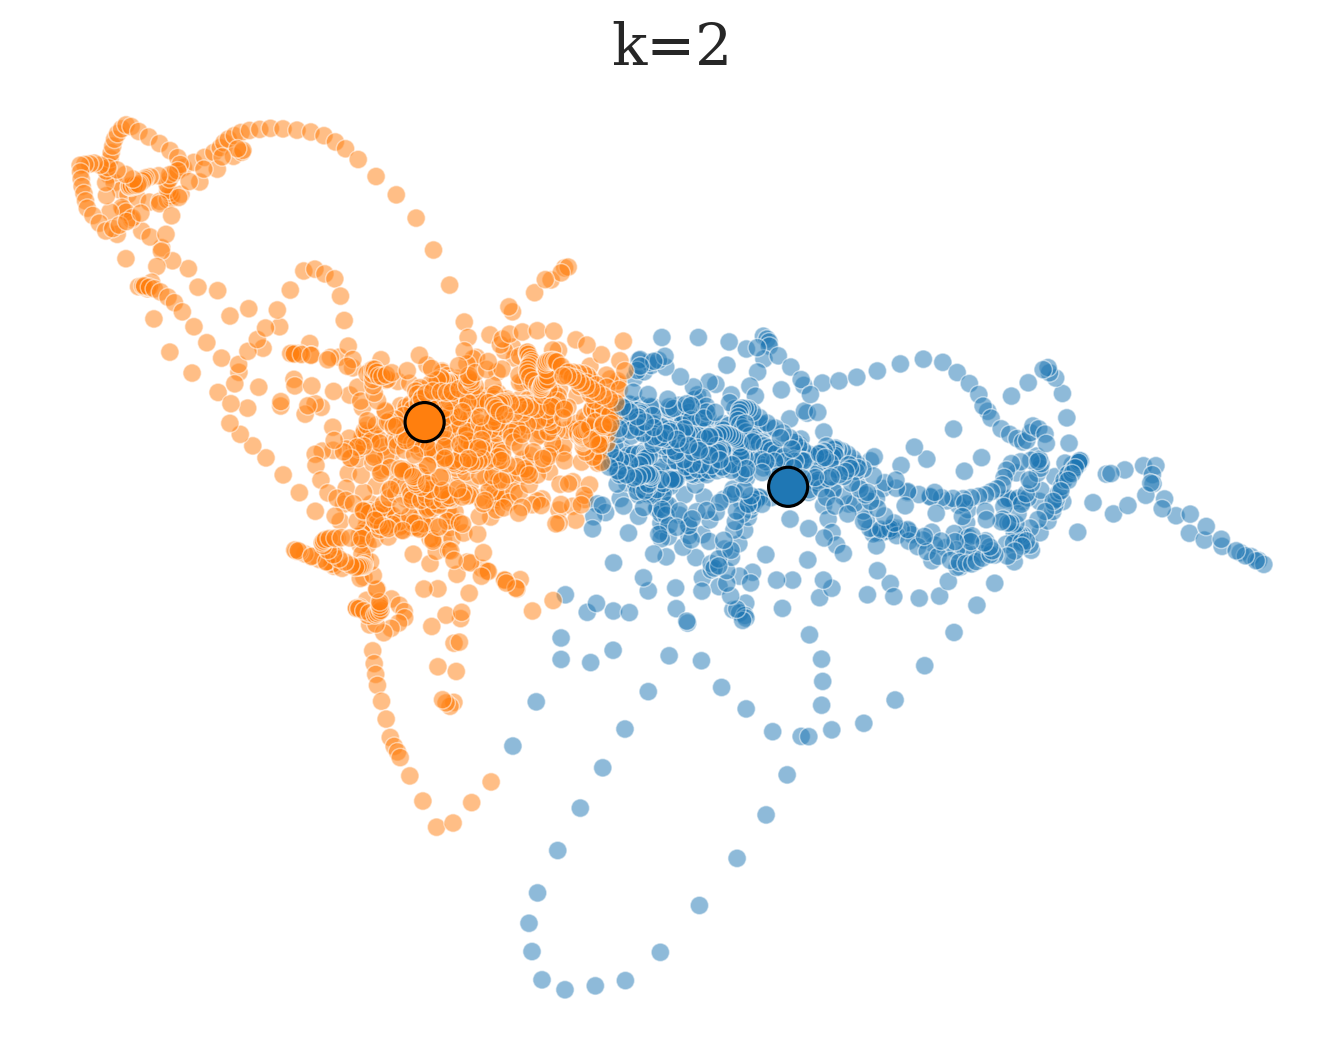

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

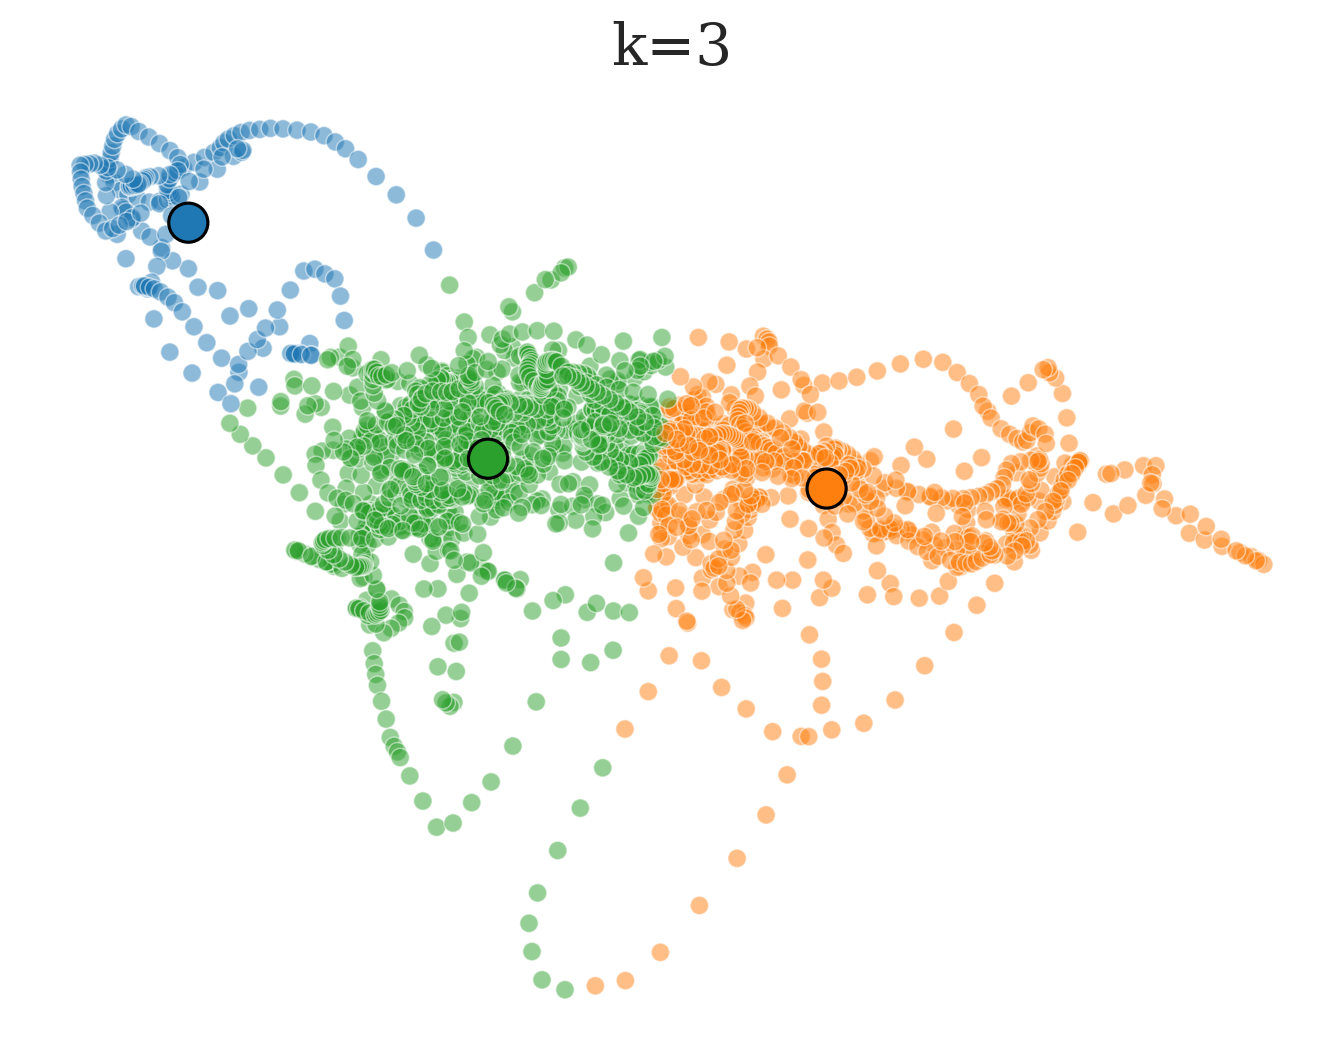

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

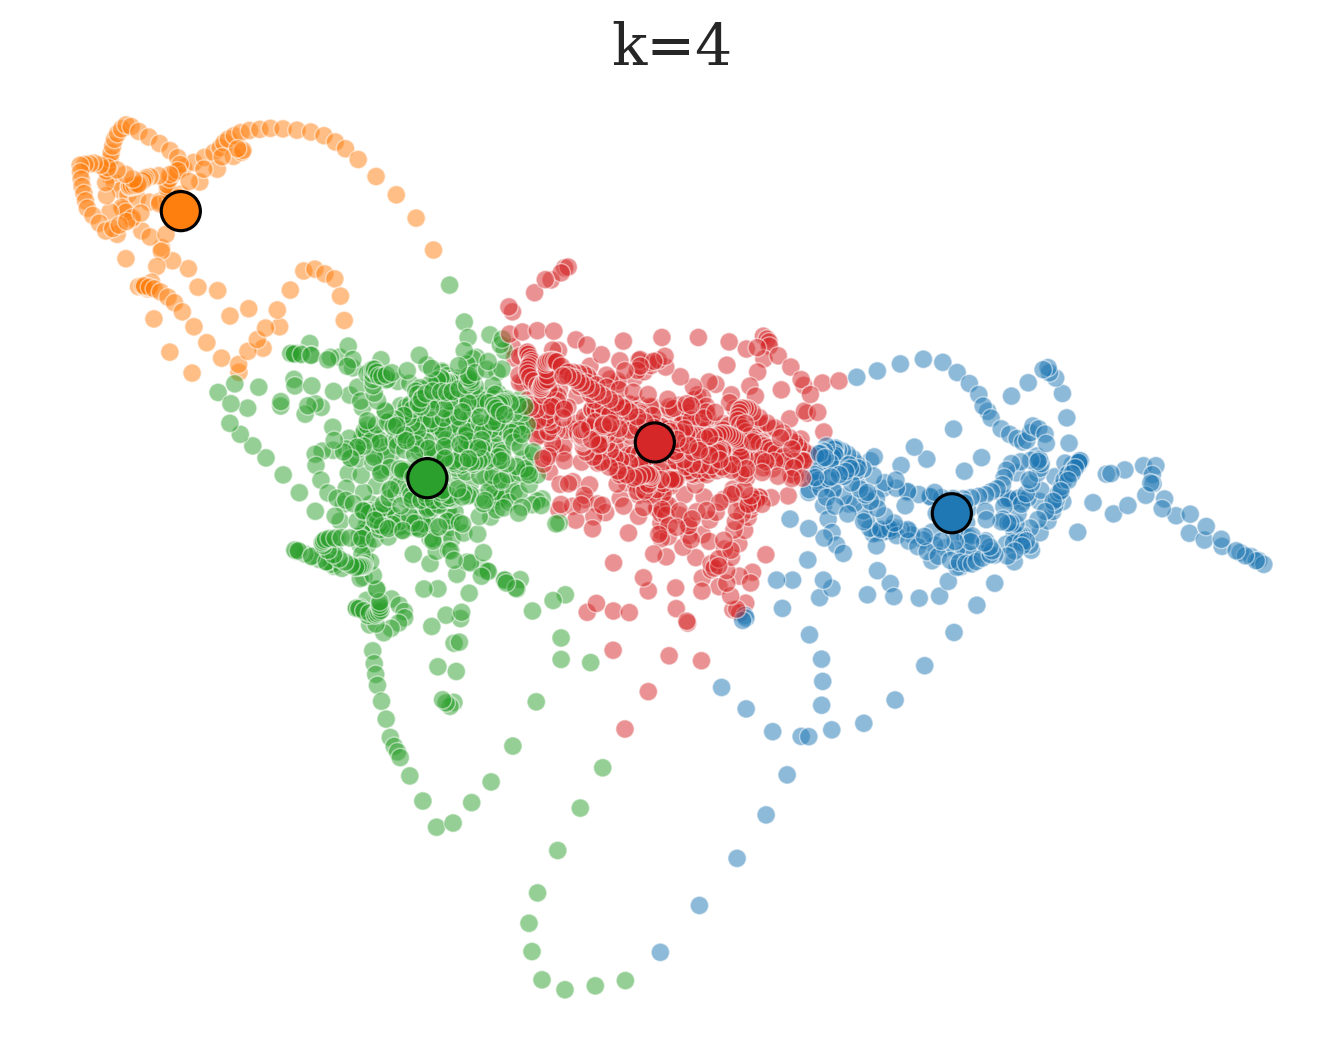

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

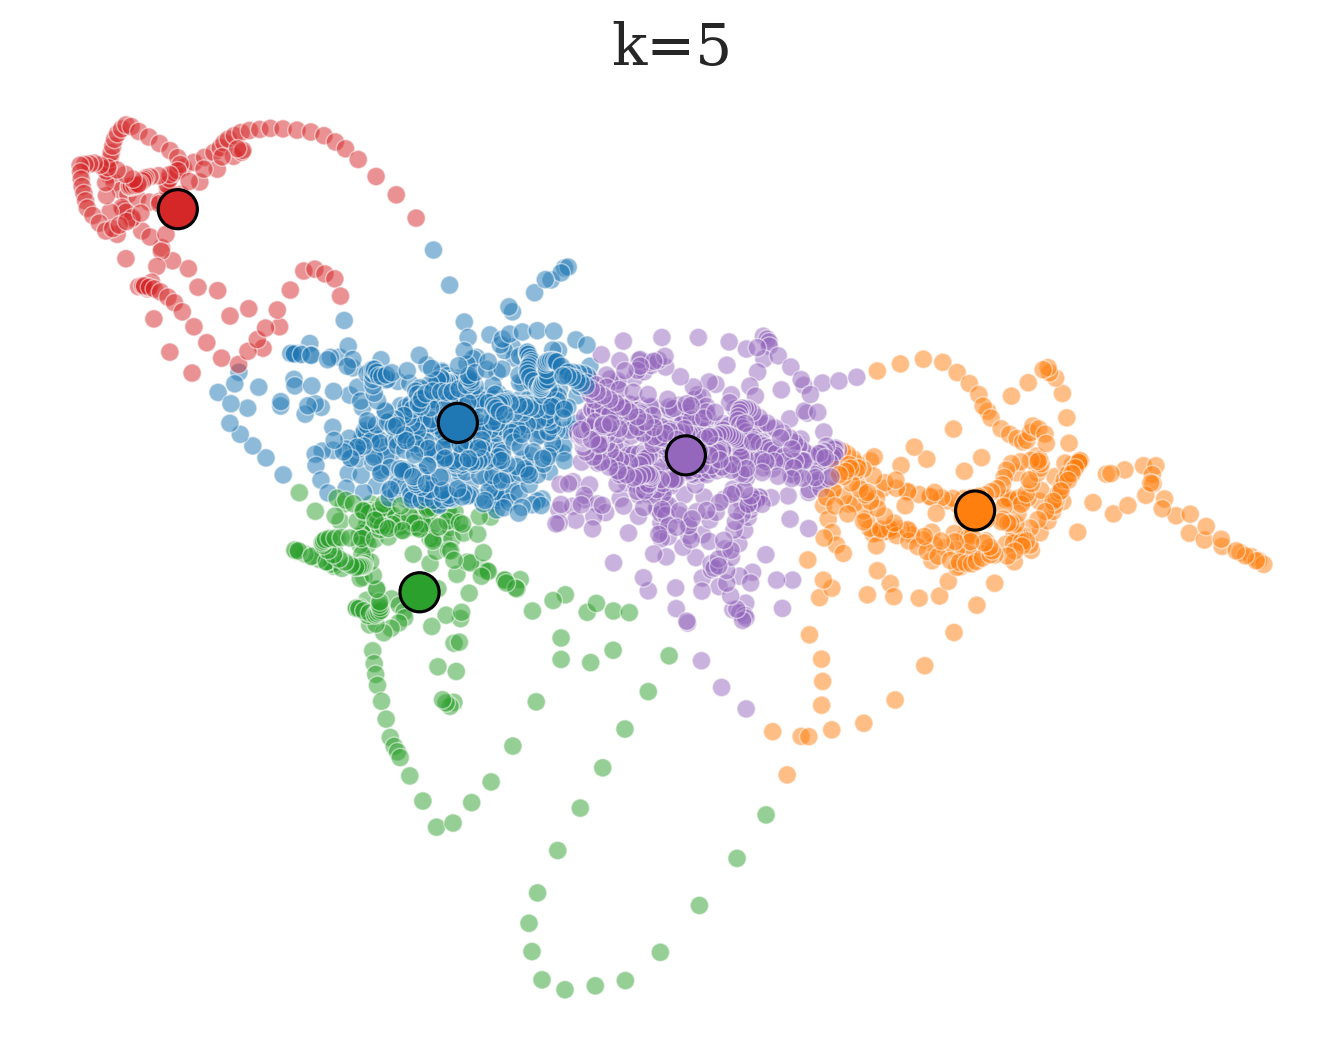

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

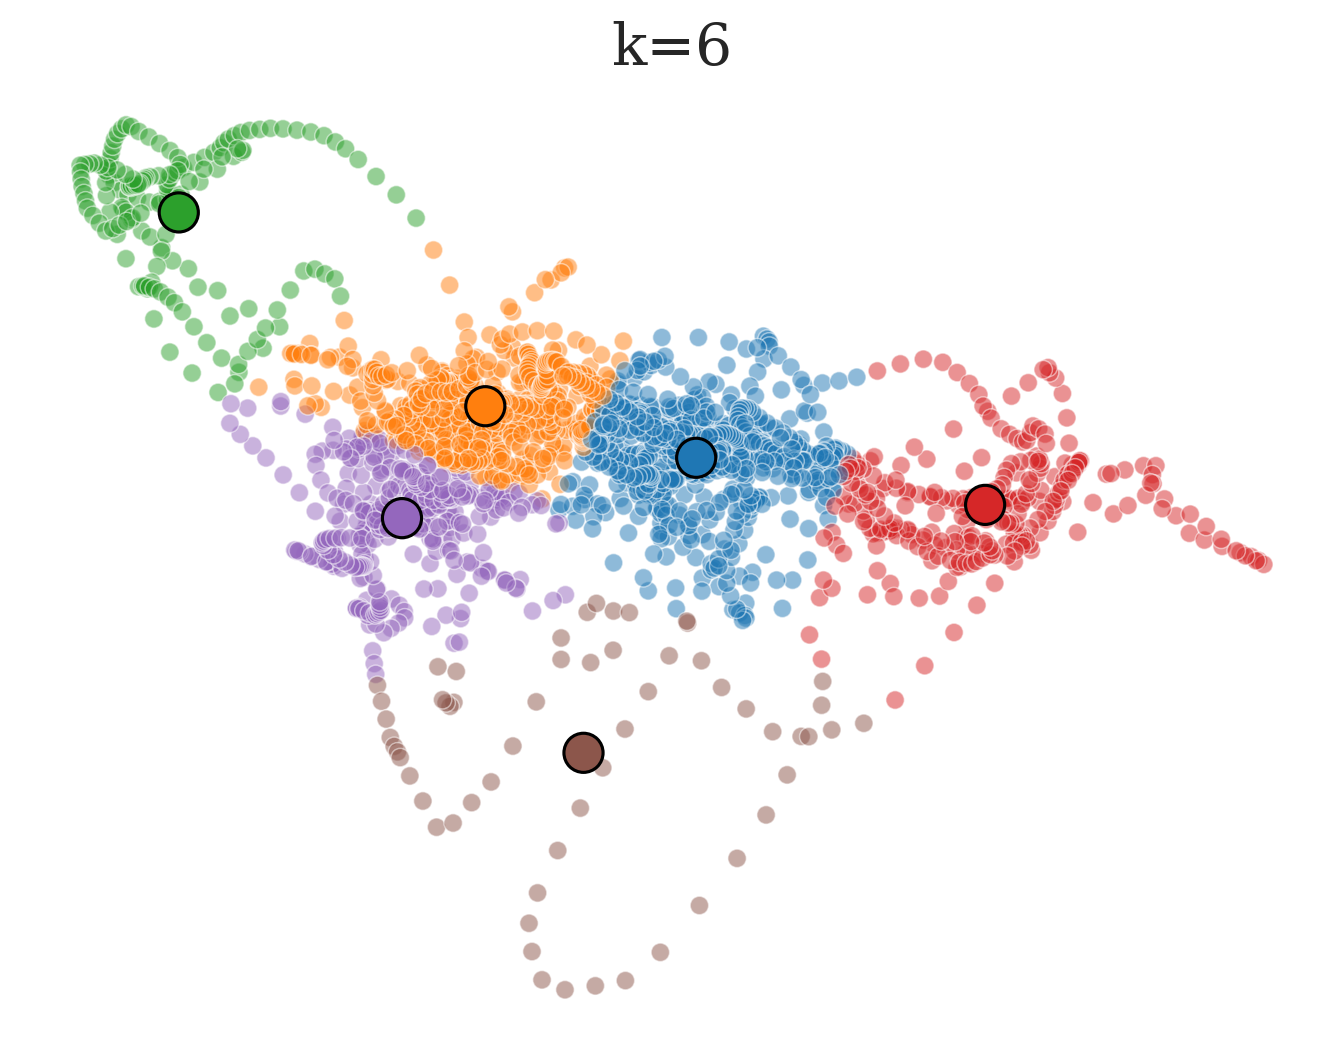

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

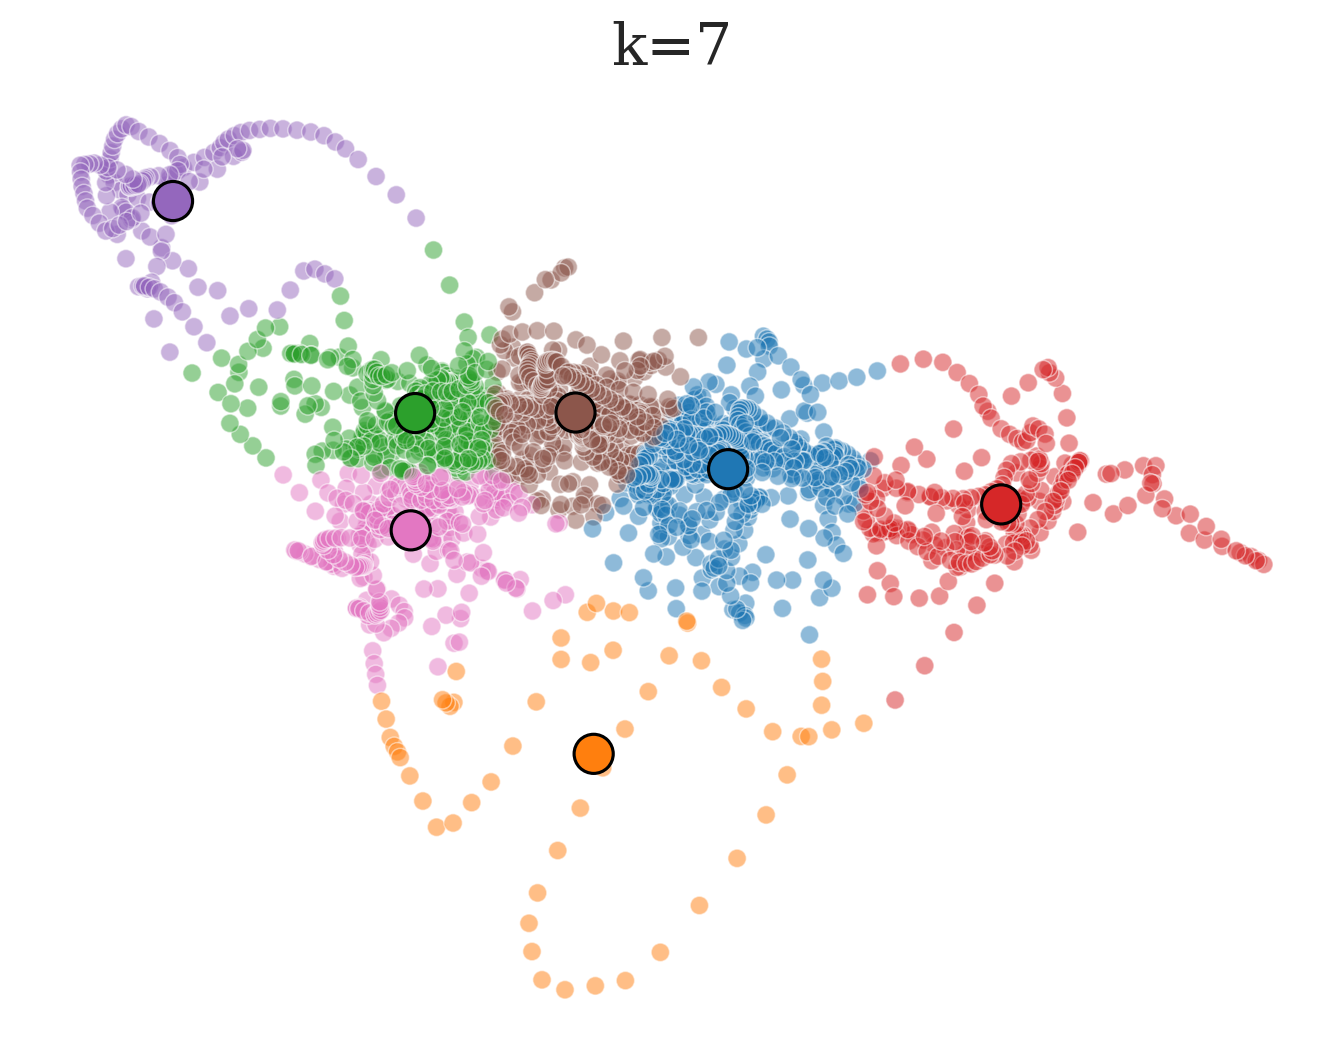

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

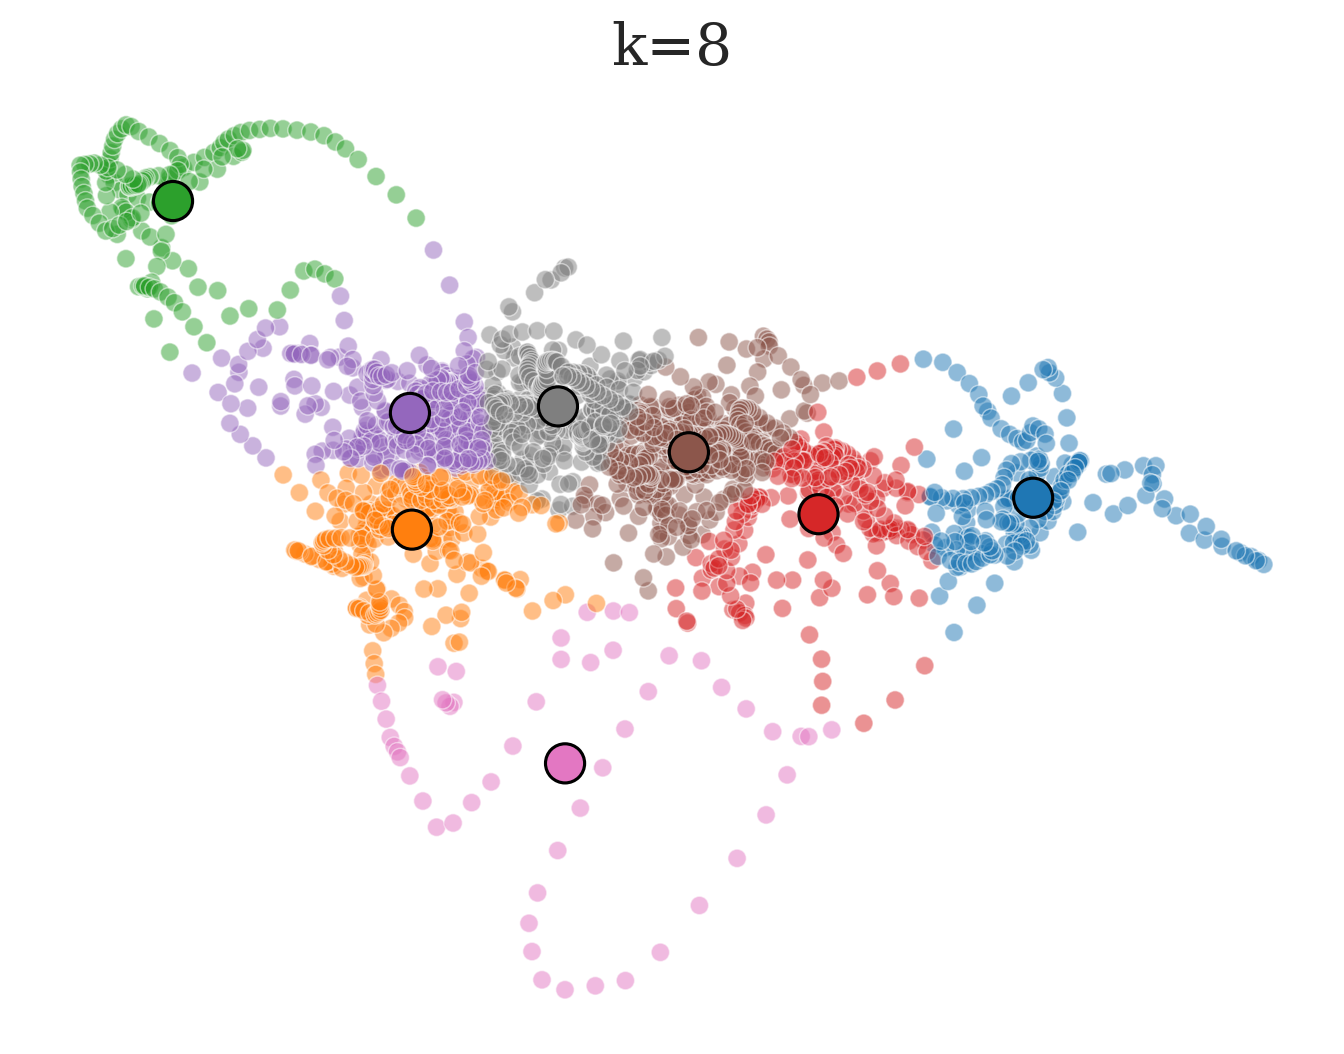

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

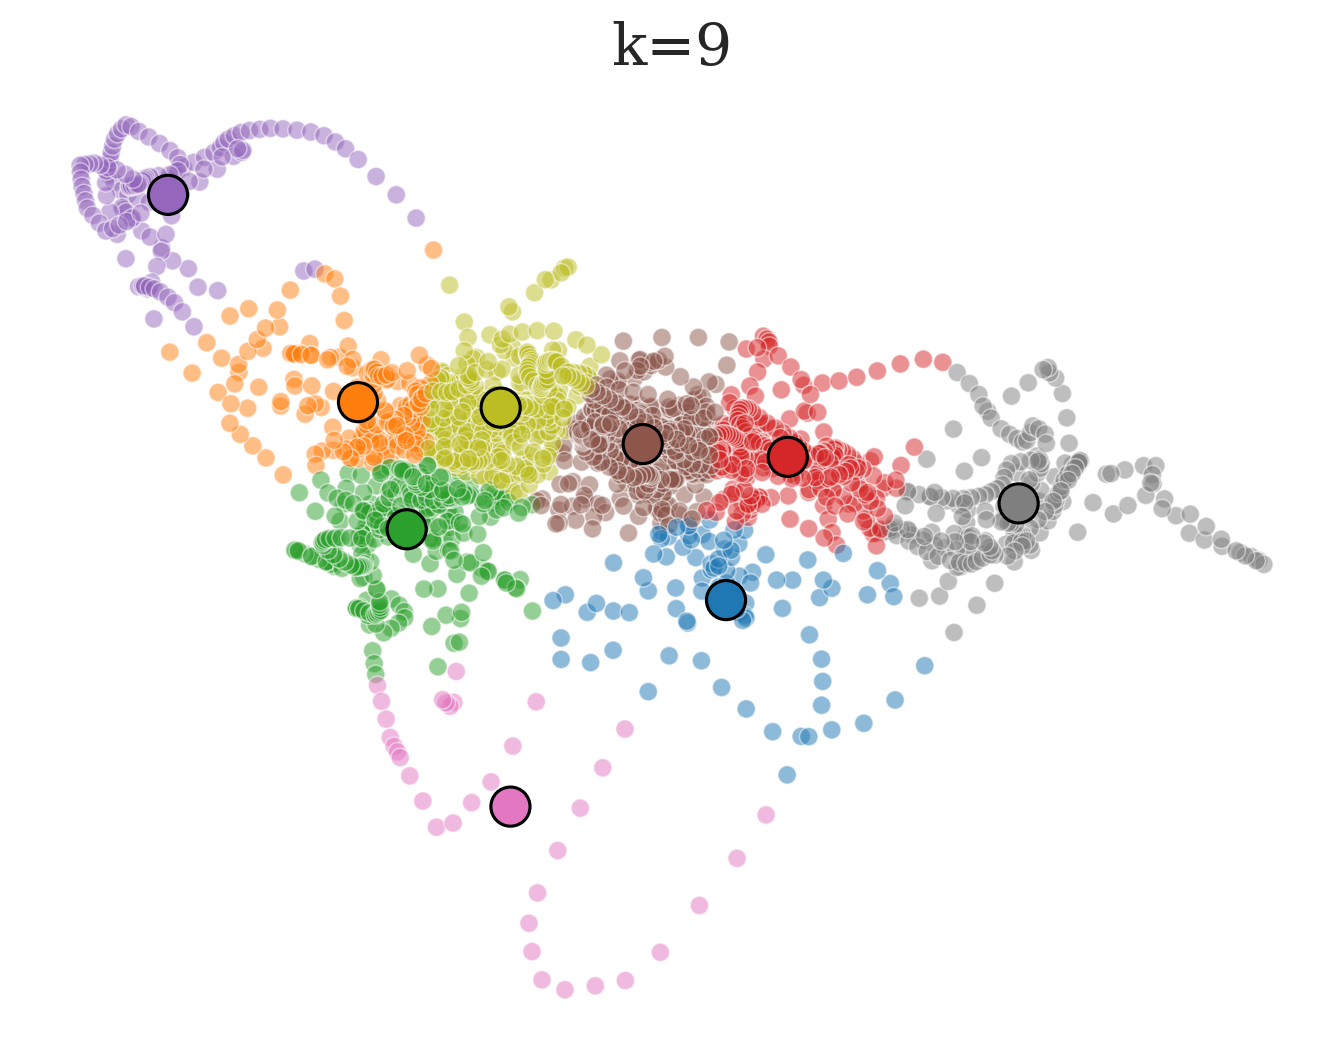

<IPython.core.display.Javascript object>

In [ ]:
experiment_number_of_clusters(X_ns, KMeans())

De esto se puede decir que la Formación K tiene 3 unidades mecánicas, obtengamos las coordenadas de los centroides que en este caso serán los valores que representarían de manera general los res grupos identificados. El siguiente código de abajo muestra los centroides gráficamente.

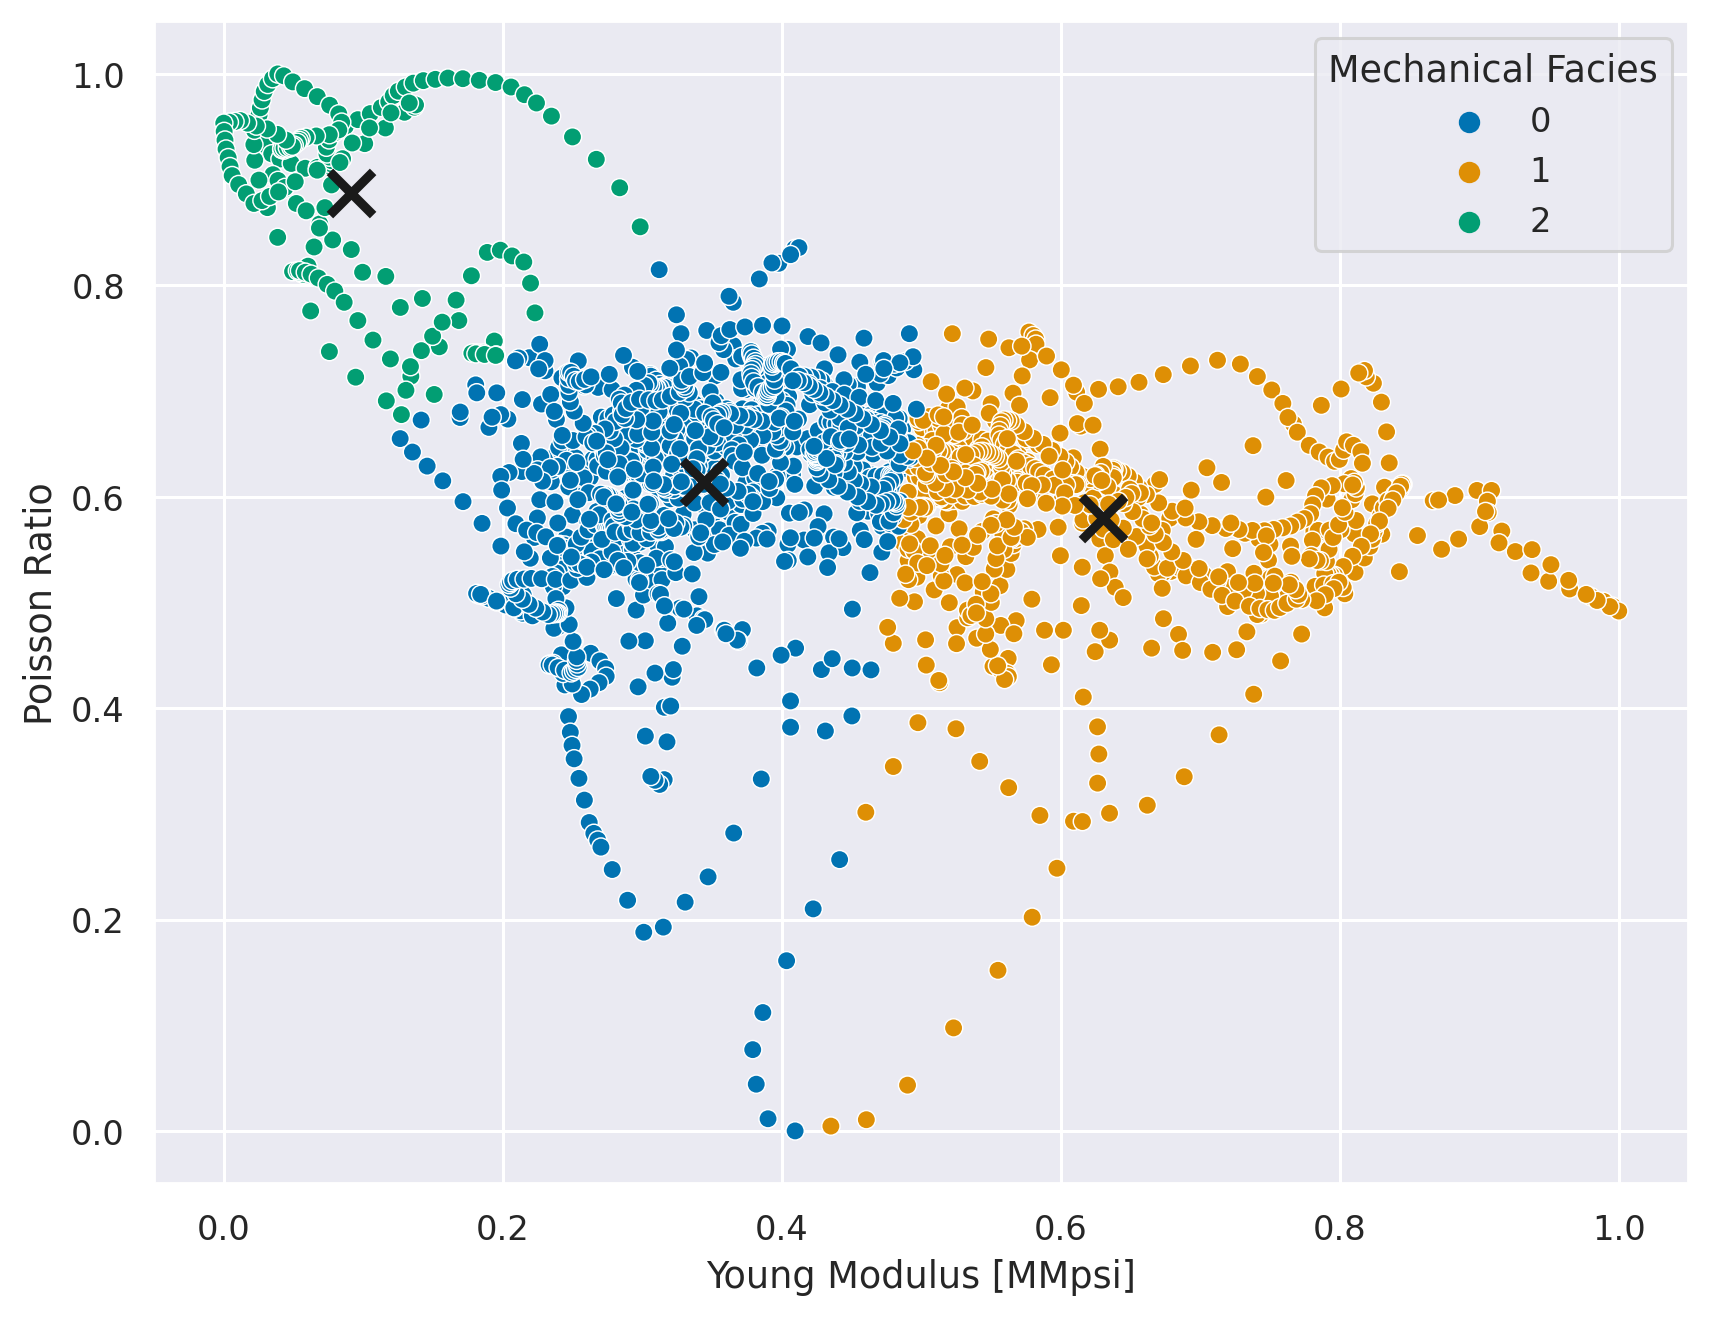

In [ ]:
# Número de clusters que se desea generar.
n = 3 # Valor obtenido con las evaluaciones internas    

km = KMeans(n_clusters = n)
km.fit(X_ns)

y = km.predict(X_ns)

# Ahora se hace la gráfica 
plt.figure(dpi = 110)
sns.scatterplot(x = X_ns[:,0], y = X_ns[:,1], hue = y, palette ='colorblind' )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            marker="x", lw=3, s=200, color = 'k')

plt.legend(title = 'Mechanical Facies'); plt.xlabel("Young Modulus [MMpsi]"); plt.ylabel("Poisson Ratio");

Las coordenadas de los centroides, es decir los valores respectivos del módulo de Young y la razón de Poisson que representan estos valores se representan a continuación.

In [ ]:
km.cluster_centers_

array([[0.34445253, 0.6140469 ],
       [0.63042681, 0.57964195],
       [0.09136212, 0.88696658]])

La idea es después utilizar esta clasificación con lo cual esta clasificación se agrega al dataframe original para luego ser exportada 

In [ ]:
ds['Mechanical Facies'] = y.tolist() # Agregamos las Facies Mecánicas al Dataframe

# Vemos que el Dataframe si haya quedado con su respectiva clasificación
print(ds)

       Depth [ft]  GR [API]  ...  Young Modulus [MMpsi]  Mechanical Facies
32835  11251.3127   75.1558  ...                 2.5743                  2
32836  11251.6408   71.3661  ...                 2.6039                  2
32837  11251.9688   65.6189  ...                 2.6412                  2
32838  11252.2969   58.8824  ...                 2.6806                  2
32839  11252.6250   53.5104  ...                 2.7340                  2
...           ...       ...  ...                    ...                ...
34955  11946.8508  120.1702  ...                 5.2111                  0
34956  11947.1788  121.1039  ...                 5.1872                  0
34957  11947.5069  120.5899  ...                 5.1612                  0
34958  11947.8350  120.4854  ...                 5.1357                  0
34959  11948.1631  120.2856  ...                 5.1105                  0

[2125 rows x 11 columns]


# ***6. Aprendizaje Supervisado para la predicción de Propiedades Mecánicas***

En este caso se hará uso de Random Forest y Support Vector Machine para estimar las propiedades mecánicas con los set de datos mencionados anteriormente.

## ***6.1 Uso de SVR***

### ***Predicción de Propiedades Mecánicas usando GR y Resisitividad***

En este caso se ha seleccionado hacer la predicción a partir de un Kernel lineal. La implementación se muestra a continuación:

In [ ]:
# Modelo de máquina de vector de soporte con kernel lineal.
from sklearn.svm import LinearSVR

# Declaramos el modelo SVC lineal para ambos conjuntos de datos con el número máximo de iteraciones
linear_UCS_X1 = LinearSVR(max_iter=5000)
linear_YM_X1 = LinearSVR(max_iter=5000)
linear_PR_X1 = LinearSVR(max_iter=5000)

# Entrenamos cada modelo con sus datos de entrada respectivos.
linear_UCS_X1.fit(X1_s_train, UCS_train)
linear_YM_X1.fit(X1_s_train, YM_train)
linear_PR_X1.fit(X1_s_train, PR_train)

LinearSVR(max_iter=5000)

El error en el conjunto de entrenamiento y prueba es el siguiente:

In [ ]:
print(f"Para el UCS:")
print(f"Error en entrenamiento:\t{1-linear_UCS_X1.score(X1_s_train, UCS_train):.4f}")
print(f"Error en prueba:\t{1-linear_UCS_X1.score(X1_s_test, UCS_test):.4f}")

print(f"Para el Módulo de Young:")
print(f"Error en entrenamiento:\t{1-linear_YM_X1.score(X1_s_train, YM_train):.4f}")
print(f"Error en prueba:\t{1-linear_YM_X1.score(X1_s_test, YM_test):.4f}")

print(f"Para la Razón de Poisson:")
print(f"Error en entrenamiento:\t{1-linear_PR_X1.score(X1_s_train, PR_train):.4f}")
print(f"Error en prueba:\t{1-linear_PR_X1.score(X1_s_test, PR_test):.4f}")

Para el UCS:
Error en entrenamiento:	0.9137
Error en prueba:	0.7317
Para el Módulo de Young:
Error en entrenamiento:	0.9128
Error en prueba:	0.7315
Para la Razón de Poisson:
Error en entrenamiento:	0.8938
Error en prueba:	0.9130


Debido a los errores tan altos obtenidos, se procederá a hacer las estimaciones con un Kernel Gaussiano

In [ ]:
from sklearn.svm import SVR      

# UCS
rbf_svr_UCS_X1 = SVR(kernel='rbf',   # Kernel de tipo RBF
              gamma = 30)  # Valor del argumento gamma

rbf_svr_UCS_X1.fit(X1_s_train, UCS_train);

# Young Modulus
rbf_svr_YM_X1 = SVR(kernel='rbf',   # Kernel de tipo RBF
              gamma = 20)  # Valor del argumento gamma

rbf_svr_YM_X1.fit(X1_s_train, YM_train);

# Poisson Ratio
rbf_svr_PR_X1 = SVR(kernel='rbf',   # Kernel de tipo RBF
              gamma = 10)  # Valor del argumento gamma

rbf_svr_PR_X1.fit(X1_s_train, PR_train);



El error en el conjunto de entrenamiento y prueba es el siguiente:

In [ ]:
print(f"Para el UCS:")
print(f"Error en entrenamiento:\t{1-rbf_svr_UCS_X1.score(X1_s_train, UCS_train):.4f}")
print(f"Error en prueba:\t{1-rbf_svr_UCS_X1.score(X1_s_test, UCS_test):.4f}")

print(f"Para el Módulo de Young:")
print(f"Error en entrenamiento:\t{1-rbf_svr_YM_X1.score(X1_s_train, YM_train):.4f}")
print(f"Error en prueba:\t{1-rbf_svr_YM_X1.score(X1_s_test, YM_test):.4f}")

print(f"Para la Razón de Poisson:")
print(f"Error en entrenamiento:\t{1-rbf_svr_PR_X1.score(X1_s_train, PR_train):.4f}")
print(f"Error en prueba:\t{1-rbf_svr_PR_X1.score(X1_s_test, PR_test):.4f}")

Para el UCS:
Error en entrenamiento:	0.2947
Error en prueba:	0.3083
Para el Módulo de Young:
Error en entrenamiento:	0.3012
Error en prueba:	0.3114
Para la Razón de Poisson:
Error en entrenamiento:	0.7447
Error en prueba:	0.8214


Cómo se puede observar se tienen ajustes con errores del 30% en promedio usando los registros GR y Resisitividad. Para la predicción de la razón de Poisson no se tienen un modelo que se ajuste a los datos. Es probable que esto se deba a que el GR y Resisitividad no son lo suficientemente correlacionables con este coeficiente.

### ***Predicción de Propiedades Mecánicas usando GR, Resisitividad, Densidad, Neutrón y Factor Fotoeléctrico***

Para mejorar el modelo mencionado anteriormente se hará uso de las propiedades mecánicas tomando en cuenta otras curvas como lo son la densidad, el neutrón y el factor fotoelétrico. Iniciemos esta predicción con un Kernel lineal.

In [ ]:
# Modelo de máquina de vector de soporte con kernel lineal.
from sklearn.svm import LinearSVR

# Declaramos el modelo SVC lineal para ambos conjuntos de datos con el número máximo de iteraciones
linear_UCS_X2 = LinearSVR(max_iter=5000)
linear_YM_X2 = LinearSVR(max_iter=5000)
linear_PR_X2 = LinearSVR(max_iter=5000)

# Entrenamos cada modelo con sus datos de entrada respectivos.
linear_UCS_X2.fit(X2_s_train, UCS_train)
linear_YM_X2.fit(X2_s_train, YM_train)
linear_PR_X2.fit(X2_s_train, PR_train)

LinearSVR(max_iter=5000)

El error en el conjunto de entrenamiento y prueba es el siguiente:

In [ ]:
print(f"Para el UCS:")
print(f"Error en entrenamiento:\t{1-linear_UCS_X2.score(X2_s_train, UCS_train):.4f}")
print(f"Error en prueba:\t{1-linear_UCS_X2.score(X2_s_test, UCS_test):.4f}")

print(f"Para el Módulo de Young:")
print(f"Error en entrenamiento:\t{1-linear_YM_X2.score(X2_s_train, YM_train):.4f}")
print(f"Error en prueba:\t{1-linear_YM_X2.score(X2_s_test, YM_test):.4f}")

print(f"Para la Razón de Poisson:")
print(f"Error en entrenamiento:\t{1-linear_PR_X2.score(X2_s_train, PR_train):.4f}")
print(f"Error en prueba:\t{1-linear_PR_X2.score(X2_s_test, PR_test):.4f}")

Para el UCS:
Error en entrenamiento:	0.2121
Error en prueba:	0.2138
Para el Módulo de Young:
Error en entrenamiento:	0.2121
Error en prueba:	0.2141
Para la Razón de Poisson:
Error en entrenamiento:	0.7617
Error en prueba:	0.8147


Ahora apliquemos un Kernel Gaussiano

In [ ]:
# UCS
rbf_svr_UCS_X2 = SVR(kernel='rbf',   # Kernel de tipo RBF
              gamma = 10)  # Valor del argumento gamma

rbf_svr_UCS_X2.fit(X2_s_train, UCS_train);

# Young Modulus
rbf_svr_YM_X2 = SVR(kernel='rbf',   # Kernel de tipo RBF
              gamma = 10)  # Valor del argumento gamma

rbf_svr_YM_X2.fit(X2_s_train, YM_train);

# Poisson Ratio
rbf_svr_PR_X2 = SVR(kernel='rbf',   # Kernel de tipo RBF
              gamma = 12)  # Valor del argumento gamma

rbf_svr_PR_X2.fit(X2_s_train, PR_train);

El error en el conjunto de entrenamiento y prueba es el siguiente:

In [ ]:
print(f"Para el UCS:")
print(f"Error en entrenamiento:\t{1-rbf_svr_UCS_X2.score(X2_s_train, UCS_train):.4f}")
print(f"Error en prueba:\t{1-rbf_svr_UCS_X2.score(X2_s_test, UCS_test):.4f}")

print(f"Para el Módulo de Young:")
print(f"Error en entrenamiento:\t{1-rbf_svr_YM_X2.score(X2_s_train, YM_train):.4f}")
print(f"Error en prueba:\t{1-rbf_svr_YM_X2.score(X2_s_test, YM_test):.4f}")

print(f"Para la Razón de Poisson:")
print(f"Error en entrenamiento:\t{1-rbf_svr_PR_X2.score(X2_s_train, PR_train):.4f}")
print(f"Error en prueba:\t{1-rbf_svr_PR_X2.score(X2_s_test, PR_test):.4f}")

Para el UCS:
Error en entrenamiento:	0.1498
Error en prueba:	0.1711
Para el Módulo de Young:
Error en entrenamiento:	0.1500
Error en prueba:	0.1714
Para la Razón de Poisson:
Error en entrenamiento:	0.4815
Error en prueba:	0.6028


Con un Kernel Gaussiano tenemos en este caso un error mucho menor. Hay que tomar en cuenta que también se están usando otras curvas de registros eléctricos para llevar a cabo esta predicción. Ahora exportemos estas curvas para luego agregarlas al dataset que queremos y posteriormente exportarlo para su posterior uso. En este caso aplicamos las transformadas inversas para obtener las curvas en su escala respectiva.

In [ ]:
## Predicciones con GR y Resistividad

# UCS
UCS_pred_X1 = rbf_svr_UCS_X1.predict(X1_s) # Hacemos la predicción 
tf_y1 = yf1.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
UCS_pred_X1 = tf_y1.inverse_transform(UCS_pred_X1.reshape(-1, 1))

# Módulo de Young
YM_pred_X1 = rbf_svr_YM_X1.predict(X1_s) # Hacemos la predicción 
tf_y2 = yf2.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
YM_pred_X1 = tf_y2.inverse_transform(YM_pred_X1.reshape(-1, 1))

# Razón de Poisson
PR_pred_X1 = rbf_svr_PR_X1.predict(X1_s) # Hacemos la predicción 
tf_y3 = yf3.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
PR_pred_X1 = tf_y3.inverse_transform(PR_pred_X1.reshape(-1, 1))

## Predicciones con GR, Resistividad, Neutrón, Densidad y PEF

# UCS
UCS_pred_X2 = rbf_svr_UCS_X2.predict(X2_s) # Hacemos la predicción 
tf_y1 = yf1.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
UCS_pred_X2 = tf_y1.inverse_transform(UCS_pred_X2.reshape(-1, 1))

# Módulo de Young
YM_pred_X2 = rbf_svr_YM_X2.predict(X2_s) # Hacemos la predicción 
tf_y2 = yf2.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
YM_pred_X2 = tf_y2.inverse_transform(YM_pred_X2.reshape(-1, 1))

# Razón de Poisson
PR_pred_X2 = rbf_svr_PR_X2.predict(X2_s) # Hacemos la predicción 
tf_y3 = yf3.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
PR_pred_X2 = tf_y3.inverse_transform(PR_pred_X2.reshape(-1, 1))


# Agregamos estos datos al dataframe
ds['UCS_S1_SVR'] = UCS_pred_X1.tolist() 
ds['Young Modulus_S1_SVR'] = YM_pred_X1.tolist() 
ds['Poisson Ratio_S1_SVR'] = PR_pred_X1.tolist() 

ds['UCS_S2_SVR'] = UCS_pred_X2.tolist() 
ds['Young Modulus_S2_SVR'] = YM_pred_X2.tolist() 
ds['Poisson Ratio_S2_SVR'] = PR_pred_X2.tolist() 

# Vemos que el Dataframe si haya quedado con su respectiva clasificación
print(ds)

       Depth [ft]  GR [API]  ...  Young Modulus_S2_SVR   Poisson Ratio_S2_SVR
32835  11251.3127   75.1558  ...   [3.233527762139221]  [0.32149810969386594]
32836  11251.6408   71.3661  ...   [3.261745191181672]  [0.31000167565907844]
32837  11251.9688   65.6189  ...   [3.303823324685189]   [0.3022431238781864]
32838  11252.2969   58.8824  ...  [3.3547643930756035]  [0.29910419174261205]
32839  11252.6250   53.5104  ...  [3.3947683400628823]   [0.3039373067016603]
...           ...       ...  ...                   ...                    ...
34955  11946.8508  120.1702  ...   [4.939232043327936]   [0.2507455530743642]
34956  11947.1788  121.1039  ...   [4.957444825931156]    [0.251574608324014]
34957  11947.5069  120.5899  ...    [4.97161981793504]   [0.2518740854511997]
34958  11947.8350  120.4854  ...  [4.9759783964497375]   [0.2526362543214124]
34959  11948.1631  120.2856  ...   [4.971238529378979]  [0.25329736054682467]

[2125 rows x 17 columns]


## ***6.2 Uso de Random Forest***

Ahora procederemos a hacer estas mismas predicciones pero con Radom Forest

### ***Predicción de Propiedades Mecánicas usando GR y Resisitividad***

Importamos el método requerido y hacemos el entrenamiento y predicción para las variables deseadas

In [ ]:
from sklearn.ensemble import RandomForestRegressor

## UCS
rf_UCS_S1 = RandomForestRegressor(n_estimators = 10, random_state = 42) # Inicialización del modelo
rf_UCS_S1.fit(X1_s_train, UCS_train) # Entrenamiento
UCS_RF_pred1 = rf_UCS_S1.predict(X1_s_test) # Predicción

## Young Modulus
rf_YM_S1 = RandomForestRegressor(n_estimators = 8, random_state = 42) 
rf_YM_S1.fit(X1_s_train, YM_train); 
YM_RF_pred1 = rf_YM_S1.predict(X1_s_test)

## Poisson Ratio
rf_PR_S1 = RandomForestRegressor(n_estimators = 10, random_state = 42) 
rf_PR_S1.fit(X1_s_train, PR_train); 
PR_RF_pred1 = rf_PR_S1.predict(X1_s_test)

Ahora haremos el cálculo de los errores por cada método. En este caso se hará el cálculo del MSE, RMSE y R2

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f"Para el UCS:")
print(f'Error cuadrático medio: {mean_squared_error(UCS_test, UCS_RF_pred1):.4f}') # Mean-Squared-Error
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(UCS_test, UCS_RF_pred1)):.4f}') # Root-Mean-Squared-Error
print(f'Coeficiente de Determinación: {r2_score(UCS_test, UCS_RF_pred1):.4f}') #R2
print(f"")

print(f"Para el Módulo de Young:")
print(f'Error cuadrático medio: {mean_squared_error(YM_test, YM_RF_pred1):.4f}') # Mean-Squared-Error
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(YM_test, YM_RF_pred1)):.4f}') # Root-Mean-Squared-Error
print(f'Coeficiente de Determinación: {r2_score(YM_test, YM_RF_pred1):.4f}') #R2
print(f"")

print(f"Para la razón de Poisson:")
print(f'Error cuadrático medio: {mean_squared_error(PR_test, PR_RF_pred1):.4f}') # Mean-Squared-Error
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(PR_test, PR_RF_pred1)):.4f}') # Root-Mean-Squared-Error
print(f'Coeficiente de Determinación: {r2_score(PR_test, PR_RF_pred1):.4f}') #R2
print(f"")

Para el UCS:
Error cuadrático medio: 0.0118
Raíz del error cuadrático medio: 0.1085
Coeficiente de Determinación: 0.6531

Para el Módulo de Young:
Error cuadrático medio: 0.0122
Raíz del error cuadrático medio: 0.1105
Coeficiente de Determinación: 0.6400

Para la razón de Poisson:
Error cuadrático medio: 0.0113
Raíz del error cuadrático medio: 0.1064
Coeficiente de Determinación: 0.2135



Con RandomForest tenemos menores errores que con SVR. Así mismo la menor correlación que se tiene es con la razón de Poisson.

### ***Predicción de Propiedades Mecánicas usando GR, Resisitividad, Densidad, Neutrón y Factor Fotoeléctrico***

Haremos esto ahora para el segundo set de datos

In [ ]:
## UCS
rf_UCS_S2 = RandomForestRegressor(n_estimators = 10, random_state = 42) # Inicialización del modelo
rf_UCS_S2.fit(X2_s_train, UCS_train) # Entrenamiento
UCS_RF_pred2 = rf_UCS_S2.predict(X2_s_test) # Predicción

## Young Modulus
rf_YM_S2 = RandomForestRegressor(n_estimators = 8, random_state = 42) 
rf_YM_S2.fit(X2_s_train, YM_train); 
YM_RF_pred2 = rf_YM_S2.predict(X2_s_test)

## Poisson Ratio
rf_PR_S2 = RandomForestRegressor(n_estimators = 10, random_state = 42) 
rf_PR_S2.fit(X2_s_train, PR_train); 
PR_RF_pred2 = rf_PR_S2.predict(X2_s_test)

Ahora haremos el cálculo de los errores por cada método. Estos errores son los mismo que los calculados en la etapa anterior

In [ ]:
print(f"Para el UCS:")
print(f'Error cuadrático medio: {mean_squared_error(UCS_test, UCS_RF_pred2):.4f}') # Mean-Squared-Error
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(UCS_test, UCS_RF_pred2)):.4f}') # Root-Mean-Squared-Error
print(f'Coeficiente de Determinación: {r2_score(UCS_test, UCS_RF_pred2):.4f}') #R2
print(f"")

print(f"Para el Módulo de Young:")
print(f'Error cuadrático medio: {mean_squared_error(YM_test, YM_RF_pred2):.4f}') # Mean-Squared-Error
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(YM_test, YM_RF_pred2)):.4f}') # Root-Mean-Squared-Error
print(f'Coeficiente de Determinación: {r2_score(YM_test, YM_RF_pred2):.4f}') #R2
print(f"")

print(f"Para la razón de Poisson:")
print(f'Error cuadrático medio: {mean_squared_error(PR_test, PR_RF_pred2):.4f}') # Mean-Squared-Error
print(f'Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(PR_test, PR_RF_pred2)):.4f}') # Root-Mean-Squared-Error
print(f'Coeficiente de Determinación: {r2_score(PR_test, PR_RF_pred2):.4f}') #R2
print(f"")

Para el UCS:
Error cuadrático medio: 0.0047
Raíz del error cuadrático medio: 0.0687
Coeficiente de Determinación: 0.8608

Para el Módulo de Young:
Error cuadrático medio: 0.0050
Raíz del error cuadrático medio: 0.0704
Coeficiente de Determinación: 0.8538

Para la razón de Poisson:
Error cuadrático medio: 0.0069
Raíz del error cuadrático medio: 0.0831
Coeficiente de Determinación: 0.5203



Como era de esperarse en este caso usando las 5 curvas de registros hemos obtenido errores menores comparados a los obtenidos con el set de las 2 curvas. en este caso haremos la predicción para ambos set de datos y los uniremos al dataframe final. Una vez hecho esto los exportaremos.

In [ ]:
## Predicciones con GR y Resistividad

# UCS
UCS_pred_X1 = rf_UCS_S1.predict(X1_s) # Hacemos la predicción 
tf_y1 = yf1.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
UCS_pred_X1 = tf_y1.inverse_transform(UCS_pred_X1.reshape(-1, 1))

# Módulo de Young
YM_pred_X1 = rf_YM_S1.predict(X1_s) # Hacemos la predicción 
tf_y2 = yf2.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
YM_pred_X1 = tf_y2.inverse_transform(YM_pred_X1.reshape(-1, 1))

# Razón de Poisson
PR_pred_X1 = rf_PR_S1.predict(X1_s) # Hacemos la predicción 
tf_y3 = yf3.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
PR_pred_X1 = tf_y3.inverse_transform(PR_pred_X1.reshape(-1, 1))

## Predicciones con GR, Resistividad, Neutrón, Densidad y PEF

# UCS
UCS_pred_X2 = rf_UCS_S2.predict(X2_s) # Hacemos la predicción 
tf_y1 = yf1.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
UCS_pred_X2 = tf_y1.inverse_transform(UCS_pred_X2.reshape(-1, 1))

# Módulo de Young
YM_pred_X2 = rf_YM_S2.predict(X2_s) # Hacemos la predicción 
tf_y2 = yf2.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
YM_pred_X2 = tf_y2.inverse_transform(YM_pred_X2.reshape(-1, 1))

# Razón de Poisson
PR_pred_X2 = rf_PR_S2.predict(X2_s) # Hacemos la predicción 
tf_y3 = yf3.named_transformers_['scaler'] # Obtenemos la transformada de ColumScaler
PR_pred_X2 = tf_y3.inverse_transform(PR_pred_X2.reshape(-1, 1))


# Agregamos estos datos al dataframe
ds['UCS_S1_RF'] = UCS_pred_X1.tolist() 
ds['Young Modulus_S1_RF'] = YM_pred_X1.tolist() 
ds['Poisson Ratio_S1_RF'] = PR_pred_X1.tolist() 

ds['UCS_S2_RF'] = UCS_pred_X2.tolist() 
ds['Young Modulus_S2_RF'] = YM_pred_X2.tolist() 
ds['Poisson Ratio_S2_RF'] = PR_pred_X2.tolist() 

# Vemos que el Dataframe si haya quedado con su respectiva clasificación y luego lo exportamos
print(ds)
ds.to_csv('DataFrameMechanical')

       Depth [ft]  GR [API]  ...   Young Modulus_S2_RF    Poisson Ratio_S2_RF
32835  11251.3127   75.1558  ...           [3.0129375]  [0.31903000000000004]
32836  11251.6408   71.3661  ...           [3.0351375]  [0.32825999999999994]
32837  11251.9688   65.6189  ...  [3.0794249999999996]              [0.30647]
32838  11252.2969   58.8824  ...             [3.91255]  [0.24774000000000002]
32839  11252.6250   53.5104  ...               [2.734]                [0.337]
...           ...       ...  ...                   ...                    ...
34955  11946.8508  120.1702  ...   [5.288287500000001]              [0.25662]
34956  11947.1788  121.1039  ...              [5.1872]              [0.26751]
34957  11947.5069  120.5899  ...              [5.1795]              [0.26755]
34958  11947.8350  120.4854  ...   [5.131412500000001]  [0.24869999999999998]
34959  11948.1631  120.2856  ...  [5.1162125000000005]  [0.24859999999999996]

[2125 rows x 23 columns]


# ***7. Conclusiones***



1.   Este proyecto permitió llevar a cabo la predicción de Facies Mecánicas a través de Aprendizaje No Supervisado usando el algoritmo de K-means y evaluando el desempeñor del mismo a través de los evaluadores de desempeño internos (inercia y coeficiente de silueta).
2.   Así mismo se logró hacer la predicción de las Propiedades Mecánicas a partir de dos sets de datos, el primer set es un set de curvas de GR y Resistividad. El segundo set es un set de curvas de GR, Resistividad, Neutrón, Densidad y Factor Fotoeléctrico. En general se observó un mejor desempeño con el segundo set.
3.   Para la predicción de las propiedades mecánicas se hizo uso de dos algoritmos de aprendizaje supervisado que fueron SVR y Random Forest. Este último presentó un mejor desempeño.
4.   Con el ánimo de usar estos datos y compararlos visualmente, se hizo la predicción de todo el set de datos y se aplicaron transformadas inversas para obtener los datos no estandarizados. 
5.    Todos los datos eran datos numéricos, no categóricos y por lo tanto solamente fue necesario hacer estandarizaciones numéricas. Con el ánimo de mantener la forma de los datos la estandarización realizada fue la de MinMaxScaler()

